# Exploring and Visualizing Valorant Agents Data: A Data Story

## Part 1: Dataset Selection and Justification

Welcome to the exploration and analysis of a custom dataset centred around Valorant Agents. Valorant, a first-person shooter game developed by Riot Games and released in June 2020, stands as a focal point of the analysis. This exploration aims to unravel the intricacies of Valorant's mechanics and equip players with comprehensive knowledge to make informed choices regarding agent selection.

The dataset encompasses vital details about Valorant agents, including agent names, pick rates, rounds played with specific agents, agent ratings, headshot percentages (HS%), and the pivotal Average Combat Score (ACS). The ACS serves as a crucial metric, influenced by various factors like the player's K/D ratio, average damage per round (ADR), average kills per round (KDR), average damage caused per round (DPR), average assists per round (APR), first death per round (FDPR), First Blood per Round (FBPR),  and first blood success rate (FBSR), reflecting player performance within the game.

This analysis strives to identify the most optimal Valorant agent, particularly suited for intermediate-level players or those struggling to determine their primary agent. The objective is to comprehend the direct correlation between an agent's effectiveness and a player's Average Combat Score (ACS). This metric significantly impacts a player's progression pace and overall advancement in Valorant.

Maintaining a statistical focus independent of individual player strategies, this study meticulously examines and correlates agent choices with ACS data to offer conclusive insights. The intent is to empower intermediate-level players with valuable insights for informed decision-making in agent selection, thereby elevating their overall performance and strategic gameplay in Valorant.

__Provide link and citation to the selected data set__

denisecammarota. (2021). Valorant Visualization and Analysis. [CSV file]. Kaggle. Available at: https://www.kaggle.com/datasets/anud3ep/valorant?select=agents.csv

## Part 2: Data Cleaning and Transformation

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Importing all the relevant libraries that will be used. Pandas and Numpy will be used for Data Manipulation and numerical calculations. Also, Matplotlo=ib and Seaborn will be used for Data Visualizations. 

### Reading Dataset:

In [2]:
# Read and load data from CSV file 
agents_data = pd.read_csv('agents.csv')
agents_data

,agent,pick_rate,rounds,rating,ACS,K/D,ADR,KPR,DPR,APR,FBPR,FDPR,HS%,FBSR%
0,Jett,78.14%,462467,1.08,232.8,1.10,148.7,0.82,0.74,0.16,0.19,0.16,25%,54%
1,Sova,76.00%,450157,0.97,194.6,0.98,133.5,0.66,0.68,0.32,0.06,0.06,25%,49%
2,Astra,48.14%,284853,0.98,186.6,0.99,123.8,0.68,0.68,0.32,0.07,0.07,26%,48%
3,Viper,42.67%,253988,0.95,193.1,0.97,128.4,0.67,0.69,0.28,0.08,0.09,25%,46%
4,Killjoy,34.27%,202132,0.91,197.4,1.00,134.3,0.69,0.69,0.18,0.08,0.09,22%,48%
5,Chamber,34.14%,203821,1.01,214.6,1.09,140.2,0.77,0.71,0.15,0.13,0.11,25%,55%
6,Skye,30.47%,180913,0.94,186.1,0.93,122.8,0.66,0.71,0.29,0.08,0.10,26%,45%
7,Sage,28.04%,165744,0.93,178.2,0.90,117.5,0.63,0.70,0.33,0.07,0.09,25%,45%
8,KAY/O,25.84%,153811,1.02,193.5,0.92,127.5,0.66,0.72,0.43,0.08,0.10,23%,46%
9,Raze,23.79%,141825,1.07,236.1,1.05,156.6,0.79,0.75,0.23,0.15,0.14,18%,50%


Let's break down each column in the dataset:

1. **Agent**: This column lists the names of different agents from Valorant; Each row represents a specific agent.

2. **Pick Rate**: The percentage of times (out of total matches) this particular agent is chosen or picked by players.

3. **Rounds**: Total number of rounds this agent has been involved in across all matches or games played.

4. **Rating**: A performance rating assigned to the agent based on various metrics or calculations specific to the game. It's a measure of overall effectiveness.

5. **ACS (Average Combat Score)**: A performance metric that represents an agent's contribution to combat situations in the game. It include points for kills, assists, etc., depending on the game's mechanics which we will dive down further in this analysation. 

6. **K/D (Kill/Death Ratio)**: The ratio of kills to deaths for the agent. It indicates the number of kills per death in the game.

7. **ADR (Average Damage per Round)**: The average amount of damage inflicted by the agent in each round of the game.

8. **KPR (Kills per Round)**: The average number of kills the agent achieves in each round played.

9. **DPR (Average Damage caused per Round)**: The average damaged caused per round of different agent incurs in each round played. This includes the damage of an agent with their abilities not just in the gun damage. 

10. **APR (Average Assists per Round)**: The average number of assists the agent contributes in each round played.

11. **FBPR (First Blood per Round)**: The average number of times the agent achieves the first kill in each round played.

12. **FDPR (First Death per Round)**: The average number of times the agent experiences the first death in each round played.

13. **HS% (Headshot Percentage)**: The percentage of kills achieved by the agent through headshots compared to overall kills.

14. **FBSR% (First Blood Success Rate)**: The percentage of times the agent achieves the first kill compared to the total times the agent gets the opportunity to do so.

Each column provides specific statistics or metrics associated with the performance of different agents in the game. These metrics help in assessing the strengths and weaknesses of each agent and understanding their impact on the gameplay.

### Analyzing the Dataset: 

In [3]:
agents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   agent      18 non-null     object 
 1   pick_rate  18 non-null     object 
 2   rounds     18 non-null     int64  
 3   rating     18 non-null     float64
 4   ACS        18 non-null     float64
 5   K/D        18 non-null     float64
 6   ADR        18 non-null     float64
 7   KPR        18 non-null     float64
 8   DPR        18 non-null     float64
 9   APR        18 non-null     float64
 10  FBPR       18 non-null     float64
 11  FDPR       18 non-null     float64
 12  HS%        18 non-null     object 
 13  FBSR%      18 non-null     object 
dtypes: float64(9), int64(1), object(4)
memory usage: 2.1+ KB


__Observation__

Within this dataset, we've utilized a dictionary to delineate the categorization of Valorant's 18 available agents into four distinct categories. Above, we present these categories along with their corresponding agents. Distinct observation is that our 'pick_rate' column is an object therefore, we must convert this into a numerical data type for calculation and data visualisations. 

In [4]:
# Define the categories and corresponding agents

categories = {
    'Duelist': ['Phoenix', 'Reyna', 'Jett', 'Raze', 'Yoru', 'Neon'],
    'Controller': ['Brimstone', 'Viper', 'Omen', 'Astra'],
    'Sentinel': ['Sage', 'Cypher', 'Killjoy', 'Chamber'],
    'Initiator': ['Sova', 'Breach', 'Skye', 'KAY/O']
}

# Printing categories and agents
for category, agents in categories.items():
    print(f'{category}:')
    for agent in agents:
        print(f'    {agent}')
    print()


Duelist:
    Phoenix
    Reyna
    Jett
    Raze
    Yoru
    Neon

Controller:
    Brimstone
    Viper
    Omen
    Astra

Sentinel:
    Sage
    Cypher
    Killjoy
    Chamber

Initiator:
    Sova
    Breach
    Skye
    KAY/O



__Observation__

Organizing the agents by their respective roles using a dictionary allows for a clearer comprehension of the correlations among metrics within the roles of these agents which we will dive deeper on later parts.

### 2.1: Check for missing values

In [5]:
# Data Cleaning and Transformation

# Check for missing values
print(agents_data.isnull().sum())

# Handling missing values - dropping rows with any missing values
agents_data.dropna(inplace=True)

agent        0
pick_rate    0
rounds       0
rating       0
ACS          0
K/D          0
ADR          0
KPR          0
DPR          0
APR          0
FBPR         0
FDPR         0
HS%          0
FBSR%        0
dtype: int64


__Observation__

Detecting missing values within a dataset assumes paramount importance owing to several reasons. Firstly, the presence of missing values can jeopardise the integrity and trustworthiness of analyses, potentially undermining the credibility of conclusions drawn from the dataset. Secondly, inaccurate or biased outcomes might arise from inadequately handling missing values, significantly affecting the precision of statistical analyses. Moreover, the performance of machine learning algorithms could be compromised when processing incomplete data, emphasising the necessity to address missing values for optimal model functionality. Identifying missing values enables the application of suitable imputation techniques, such as mean substitution or interpolation, to bridge data gaps effectively. Understanding the patterns of missing data offers insights into potential data collection issues or systematic errors, contributing to data quality enhancements. Consequently, addressing missing values becomes a foundational step in data preprocessing, ensuring completeness and readiness for subsequent analyses or modelling endeavours. Lastly, maintaining transparency in research necessitates candid reporting on missing data and its handling procedures, underscoring its significance in maintaining credibility and transparency in findings.

### 2.2: Checking and removing Duplications

In [6]:
# Checking duplicated data: 
# 'nunique()' method is used to count the number of unique values in each column of a DataFrame. 

agents_data.nunique()

agent        18
pick_rate    18
rounds       18
rating       15
ACS          18
K/D          14
ADR          18
KPR          10
DPR           8
APR          13
FBPR          8
FDPR         10
HS%           7
FBSR%        10
dtype: int64

In [7]:
# Remove duplicate rows
agents_data.drop_duplicates(inplace=True)

print(agents_data)

        agent pick_rate  rounds  rating    ACS   K/D    ADR   KPR   DPR   APR  \
0        Jett    78.14%  462467    1.08  232.8  1.10  148.7  0.82  0.74  0.16   
1        Sova    76.00%  450157    0.97  194.6  0.98  133.5  0.66  0.68  0.32   
2       Astra    48.14%  284853    0.98  186.6  0.99  123.8  0.68  0.68  0.32   
3       Viper    42.67%  253988    0.95  193.1  0.97  128.4  0.67  0.69  0.28   
4     Killjoy    34.27%  202132    0.91  197.4  1.00  134.3  0.69  0.69  0.18   
5     Chamber    34.14%  203821    1.01  214.6  1.09  140.2  0.77  0.71  0.15   
6        Skye    30.47%  180913    0.94  186.1  0.93  122.8  0.66  0.71  0.29   
7        Sage    28.04%  165744    0.93  178.2  0.90  117.5  0.63  0.70  0.33   
8       KAY/O    25.84%  153811    1.02  193.5  0.92  127.5  0.66  0.72  0.43   
9        Raze    23.79%  141825    1.07  236.1  1.05  156.6  0.79  0.75  0.23   
10     Breach    19.83%  118077    0.90  175.0  0.90  117.1  0.63  0.70  0.28   
11     Cypher    15.63%   92

__Observation__

The rationale behind checking and eliminating duplications within a dataset is multifaceted. Firstly, the presence of duplicate entries can distort the accuracy of analyses and computations, potentially leading to skewed insights and erroneous conclusions. Secondly, duplicated data can inflate statistical measures, affecting the reliability of derived metrics and introducing bias into subsequent analyses or models. Additionally, the computational efficiency of algorithms can be compromised when processing redundant information, necessitating the removal of duplicates to streamline operations and enhance performance. Removing duplications ensures a cleaner dataset, enabling more accurate and reliable results in subsequent analyses or predictive modelling. Furthermore, the elimination of duplicates promotes data consistency and integrity, contributing to improved data quality and robustness. Lastly, maintaining a dataset devoid of duplications facilitates clearer and more transparent reporting, supporting the credibility and trustworthiness of research findings or business insights derived from the data.

Based on the methods above, there are no duplicated rows and columns. We did not drop any data from the dataset. 

### 2.3 Data Reduction

In [8]:
# Some columns or variables can be dropped if they do not add value to the analysis.

# Dropping the column HS% since it has no relevance in the purpose of the report. 

agents_data.drop(columns=['HS%'], inplace=True)
print(agents_data.head())  # Print the DataFrame after dropping the column


     agent pick_rate  rounds  rating    ACS   K/D    ADR   KPR   DPR   APR  \
0     Jett    78.14%  462467    1.08  232.8  1.10  148.7  0.82  0.74  0.16   
1     Sova    76.00%  450157    0.97  194.6  0.98  133.5  0.66  0.68  0.32   
2    Astra    48.14%  284853    0.98  186.6  0.99  123.8  0.68  0.68  0.32   
3    Viper    42.67%  253988    0.95  193.1  0.97  128.4  0.67  0.69  0.28   
4  Killjoy    34.27%  202132    0.91  197.4  1.00  134.3  0.69  0.69  0.18   

   FBPR  FDPR FBSR%  
0  0.19  0.16   54%  
1  0.06  0.06   49%  
2  0.07  0.07   48%  
3  0.08  0.09   46%  
4  0.08  0.09   48%  


In [9]:
# Dropping the column HS%, FBSR%, and FDPR since, these have no relevance in choosing an agent. 

agentsToDrop = ['FBSR%', 'FDPR']
agents_data.drop(columns=agentsToDrop, inplace=True)
print(agents_data.head())  # Print the DataFrame after dropping the columns

     agent pick_rate  rounds  rating    ACS   K/D    ADR   KPR   DPR   APR  \
0     Jett    78.14%  462467    1.08  232.8  1.10  148.7  0.82  0.74  0.16   
1     Sova    76.00%  450157    0.97  194.6  0.98  133.5  0.66  0.68  0.32   
2    Astra    48.14%  284853    0.98  186.6  0.99  123.8  0.68  0.68  0.32   
3    Viper    42.67%  253988    0.95  193.1  0.97  128.4  0.67  0.69  0.28   
4  Killjoy    34.27%  202132    0.91  197.4  1.00  134.3  0.69  0.69  0.18   

   FBPR  
0  0.19  
1  0.06  
2  0.07  
3  0.08  
4  0.08  


__Obervation__

Engaging in data reduction, such as dropping specific columns like 'HS%', 'FBSR%', and 'FDPR' from the dataset, serves several essential purposes. Initially, discarding these columns streamlines the dataset, eliminating unnecessary or irrelevant data points that are deemed irrelevant or not conducive to the our hypothesis and analysis being pursued with this report. By doing so, it enhances the efficiency of subsequent analyses by focusing solely on the most pertinent and meaningful attributes, thereby reducing computational complexity and processing time. Additionally, eliminating these columns contributes to simplifying the interpretation of results and findings, ensuring a clearer and more concise representation of the data story. Moreover, data reduction aids in improving the overall data quality by removing potentially noisy or redundant information, resulting in a more refined and precise dataset for the targeted analysis. This strategic reduction aligns the dataset more closely with the hypothesis under investigation, allowing for a more focused and relevant exploration of the core aspects necessary for the intended data story or analysis.

### Removing '%' allows us to convert the column to a numeric data type for calculations

In [10]:
# Removing '%' symbol from 'pick_rate' column 

# Define the find_between_nolast function to remove '%'

def find_between_nolast(s, last):
    # Implement the logic to remove '%' symbol from the string
    if last in s:
        return s.replace(last, '')
    else:
        return s

# Modifying 'pick_rate' column 
list_tomodify = ['pick_rate']

for i in range(len(list_tomodify)):
    for j in range(agents_data.shape[0]):
        s_aux = agents_data[list_tomodify[i]][j]
        s_aux = find_between_nolast(s_aux, '%')
        agents_data.loc[j, list_tomodify[i]] = float(s_aux)

This code aims at modifying the 'pick_rate' column in a dataset by removing the '%' symbol from its values and converting the modified values to floats. Without converting the column 'pick_rate', this column will be considered a String because of the symbol '%'. It will hinder mathematical operations or statistical analysis. Therefore, removing '%' allows us to convert the column to a numeric data type which is float for calculations. 

In [11]:
# Checking if the primary data are structured in a consistent and uniform manner.

print(agents_data.agent.unique())
print(agents_data.agent.nunique())

['Jett' 'Sova' 'Astra' 'Viper' 'Killjoy' 'Chamber' 'Skye' 'Sage' 'KAY/O'
 'Raze' 'Breach' 'Cypher' 'Reyna' 'Omen' 'Brimstone' 'Neon' 'Phoenix'
 'Yoru']
18


__Explanation__

Verifying the uniqueness of the primary key, 'agent', within the dataset is essential. When all 'agent' values are unique, it ensures that each entry is distinct, preventing redundancy. This uniqueness guarantees accuracy in data operations, allowing for precise retrieval and analysis without concerns about duplicate entries. Essentially, confirming the 'agent' column's uniqueness ensures the dataset's integrity and efficiency in data manipulation and analysis based on this key attribute.

In [12]:
# Printing the first five rows of the modified dataset 
print(agents_data.head()) 

     agent pick_rate  rounds  rating    ACS   K/D    ADR   KPR   DPR   APR  \
0     Jett     78.14  462467    1.08  232.8  1.10  148.7  0.82  0.74  0.16   
1     Sova      76.0  450157    0.97  194.6  0.98  133.5  0.66  0.68  0.32   
2    Astra     48.14  284853    0.98  186.6  0.99  123.8  0.68  0.68  0.32   
3    Viper     42.67  253988    0.95  193.1  0.97  128.4  0.67  0.69  0.28   
4  Killjoy     34.27  202132    0.91  197.4  1.00  134.3  0.69  0.69  0.18   

   FBPR  
0  0.19  
1  0.06  
2  0.07  
3  0.08  
4  0.08  


In [13]:
# Printing the whole dataset
print(agents_data)

        agent pick_rate  rounds  rating    ACS   K/D    ADR   KPR   DPR   APR  \
0        Jett     78.14  462467    1.08  232.8  1.10  148.7  0.82  0.74  0.16   
1        Sova      76.0  450157    0.97  194.6  0.98  133.5  0.66  0.68  0.32   
2       Astra     48.14  284853    0.98  186.6  0.99  123.8  0.68  0.68  0.32   
3       Viper     42.67  253988    0.95  193.1  0.97  128.4  0.67  0.69  0.28   
4     Killjoy     34.27  202132    0.91  197.4  1.00  134.3  0.69  0.69  0.18   
5     Chamber     34.14  203821    1.01  214.6  1.09  140.2  0.77  0.71  0.15   
6        Skye     30.47  180913    0.94  186.1  0.93  122.8  0.66  0.71  0.29   
7        Sage     28.04  165744    0.93  178.2  0.90  117.5  0.63  0.70  0.33   
8       KAY/O     25.84  153811    1.02  193.5  0.92  127.5  0.66  0.72  0.43   
9        Raze     23.79  141825    1.07  236.1  1.05  156.6  0.79  0.75  0.23   
10     Breach     19.83  118077    0.90  175.0  0.90  117.1  0.63  0.70  0.28   
11     Cypher     15.63   92

### Adding new column 'Role'

The absence of a 'role' column in the dataset represents a notable gap that could significantly impact future analyses and reporting. Introducing a 'role' column would provide valuable categorical information crucial for categorising the agents based on their respective roles or functions within the context of the dataset. This additional feature could offer insights into various agent roles, such as attacker, defender, or support specific to the dataset's domain. Having this categorisation could profoundly enhance the depth of analysis, allowing for more nuanced comparisons, patterns, and correlations among agents based on their designated roles. It would empower the analysts to perform targeted investigations and draw more specific conclusions regarding the performance, strategies, or contributions of different agent roles within the dataset. Therefore, incorporating a 'role' column would not only enrich the dataset but also significantly augment the potential for comprehensive and insightful analyses in future reports or studies.

In [14]:
# Dictionary mapping agents to roles
agent_roles = {
    'Phoenix': 'Duelist', 'Reyna': 'Duelist', 'Jett': 'Duelist', 'Raze': 'Duelist', 'Yoru': 'Duelist', 'Neon': 'Duelist',
    'Brimstone': 'Controller', 'Viper': 'Controller', 'Omen': 'Controller', 'Astra': 'Controller',
    'Sage': 'Sentinel', 'Cypher': 'Sentinel', 'Killjoy': 'Sentinel', 'Chamber': 'Sentinel',
    'Sova': 'Initiator', 'Breach': 'Initiator', 'Skye': 'Initiator', 'KAY/O': 'Initiator'
}

# Add 'Role' column based on the agent_roles dictionary
agents_data['Role'] = agents_data['agent'].map(agent_roles)

agents_data

,agent,pick_rate,rounds,rating,ACS,K/D,ADR,KPR,DPR,APR,FBPR,Role
0,Jett,78.14,462467,1.08,232.8,1.10,148.7,0.82,0.74,0.16,0.19,Duelist
1,Sova,76.0,450157,0.97,194.6,0.98,133.5,0.66,0.68,0.32,0.06,Initiator
2,Astra,48.14,284853,0.98,186.6,0.99,123.8,0.68,0.68,0.32,0.07,Controller
3,Viper,42.67,253988,0.95,193.1,0.97,128.4,0.67,0.69,0.28,0.08,Controller
4,Killjoy,34.27,202132,0.91,197.4,1.00,134.3,0.69,0.69,0.18,0.08,Sentinel
5,Chamber,34.14,203821,1.01,214.6,1.09,140.2,0.77,0.71,0.15,0.13,Sentinel
6,Skye,30.47,180913,0.94,186.1,0.93,122.8,0.66,0.71,0.29,0.08,Initiator
7,Sage,28.04,165744,0.93,178.2,0.90,117.5,0.63,0.70,0.33,0.07,Sentinel
8,KAY/O,25.84,153811,1.02,193.5,0.92,127.5,0.66,0.72,0.43,0.08,Initiator
9,Raze,23.79,141825,1.07,236.1,1.05,156.6,0.79,0.75,0.23,0.15,Duelist


**Conclusion**

The dataset's readiness for analysis and visualization, as indicated by the absence of null values or duplicates, underlines its current state of cleanliness and preparedness for further exploration. This lack of required transformations signifies that the dataset has undergone thorough cleaning processes, ensuring data integrity and reliability. The absence of null values eliminates potential discrepancies or missing information, guaranteeing a robust foundation for analytical procedures. Additionally, the eradication of duplicates prevents redundancy and inaccuracies in subsequent analyses, reinforcing the dataset's credibility.

This cleaned state sets an ideal stage for various analytical methodologies, facilitating a more streamlined and accurate examination of trends, patterns, or relationships within the data. It not only expedites the analysis process but also enhances the trustworthiness of derived insights and visual representations.

By confirming its readiness for analysis and visualization, it signifies the dataset's aptness for generating meaningful visualizations, conducting statistical analyses, or implementing machine learning algorithms. This robust and cleaned dataset establishes a reliable base upon which comprehensive and insightful interpretations or predictions can be made, contributing significantly to the quality and depth of any subsequent analytical or research pursuits.

## Part 3: Exploratory Data Analysis (EDA)

In this section, our goal is to reveal significant patterns, identify emerging trends, and uncover the interrelationships among various metrics present in the dataset. Utilising visualisations like histograms and boxplots, alongside employing summary statistics, Exploratory Data Analysis (EDA) aims to reveal insights, identify anomalies, and detect outliers within the dataset. This  phase facilitates the exploration and comprehensive comprehension of the data's structure. It enables us to make informed decisions in subsequent analyses or modelling exercises. Additionally, this process aids in the formulation of hypotheses, validation of assumptions, and guides further investigations, providing valuable insights to aid Valorant players in their decision-making process when selecting an agent.

In [15]:
# 3.1 Summary Statistics

summary_statistics = agents_data.describe()
print(summary_statistics)

              rounds     rating         ACS        K/D         ADR        KPR  \
count      18.000000  18.000000   18.000000  18.000000   18.000000  18.000000   
mean   164091.888889   0.981111  201.588889   0.984444  133.077778   0.704444   
std    133889.186290   0.058801   19.217483   0.062140   12.056902   0.062235   
min      1978.000000   0.900000  175.000000   0.900000  117.100000   0.630000   
25%     82658.250000   0.932500  186.850000   0.942500  124.050000   0.660000   
50%    147818.000000   0.975000  194.050000   0.975000  130.000000   0.675000   
75%    203398.750000   1.020000  217.825000   1.037500  142.375000   0.765000   
max    462467.000000   1.080000  236.100000   1.100000  156.600000   0.820000   

             DPR        APR       FBPR  
count  18.000000  18.000000  18.000000  
mean    0.715556   0.257778   0.100556  
std     0.027273   0.088088   0.038877  
min     0.680000   0.150000   0.060000  
25%     0.700000   0.180000   0.070000  
50%     0.705000   0.255

__Observation__

The utilization of the 'describe()' method to generate summary statistics serves as a fundamental step in understanding the numerical attributes within the dataset. It computes essential descriptive statistics such as the mean, median, standard deviation, quartiles, and more for numerical variables, allowing for a quick overview of their central tendencies, variability, and distribution.

In this context, employing the 'describe()' method provides an overview of various attributes such as 'rounds' (mean = 164091.89) , 'rating' (mean = 0.98) , 'ACS' (mean = 201.59), 'K/D' (mean = 0.98) , 'ADR' (mean = 133.08) , 'KPR' (mean = 0.70), 'DPR' (mean = 0.72), 'APR' (mean = 0.26) , and FBPR (mean = 0.10) , offering insights into their statistical summaries. These statistics aid in comprehending the data's characteristics, including the average values, variability, and distributional properties of these numerical features.

However, it's notable that the 'pick_rate' attribute is not present in the summary statistics generated by 'describe()'. This absence might be due to 'pick_rate' being treated as a non-numeric or categorical variable rather than a numerical one in the dataset. If 'pick_rate' holds categorical or non-numeric data, the 'describe()' method, which computes statistics for numerical values, won't include it in the output. Therefore, this observation highlights the need to handle 'pick_rate' differently on further analysations.

In [16]:
# Summary statistics for 'pick_rate' 

pick_rate_summary = agents_data['pick_rate'].describe()

# Calculate mean and median for 'pick_rate'
pick_rate_mean = agents_data['pick_rate'].mean()
pick_rate_median = agents_data['pick_rate'].median()

print("Summary Statistics for 'pick_rate':")
print(pick_rate_summary)
print("\nMean of 'pick_rate':", pick_rate_mean)
print("Median of 'pick_rate':", pick_rate_median)


Summary Statistics for 'pick_rate':
count     18.00
unique    18.00
top       78.14
freq       1.00
Name: pick_rate, dtype: float64

Mean of 'pick_rate': 27.674999999999994
Median of 'pick_rate': 24.814999999999998


__Explanation and Observation__

The separate summary statistic for 'pick_rate' was conducted because this specific attribute did not appear in the initial summary statistics for the entire dataset. This exclusion from the overall summary hinted that 'pick_rate' might not be recognized as a numerical attribute, and as a result, its descriptive statistics were not generated alongside other numerical features.

The subsequent analysis specifically for 'pick_rate' reveals some key insights:

1. **Count and Uniqueness**: There are 18 entries for 'pick_rate', indicating that all agents in the dataset have a 'pick_rate' value recorded. The 'unique' count of 18 further confirms that each 'pick_rate' value is distinct, reflecting the diversity in how often each agent is chosen.

2. **Top and Frequency**: The most frequent 'pick_rate' value is 78.14%, occurring once. This indicates that one agent has the highest pick rate among all agents in the dataset.

3. **Mean and Median**: The mean 'pick_rate' is approximately 27.67%, while the median is approximately 24.81%. The disparity between the mean and median suggests a potential skewness in the distribution of 'pick_rate' values, indicating that a few agents might have exceptionally high pick rates, influencing the mean.

In summary, the separate summary statistics for 'pick_rate' provide a focused understanding of its distribution within the dataset. The mean and median values offer insights into the central tendency of pick rates, and the frequency count underscores the uniqueness of each agent's pick rate. This information is valuable for understanding the popularity or frequency of selection for each agent, contributing to a more comprehensive analysis of agent dynamics in the dataset.

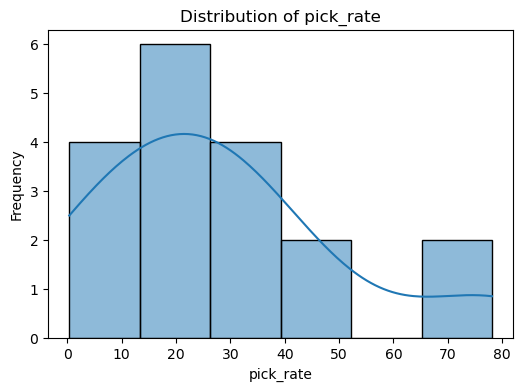

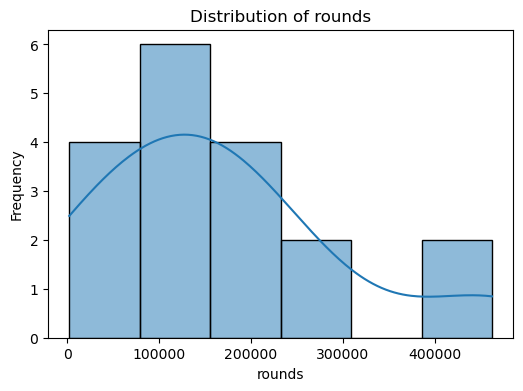

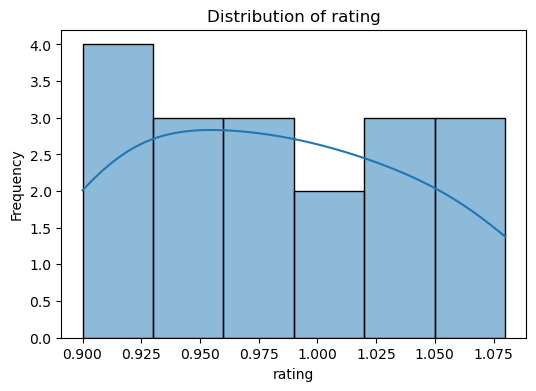

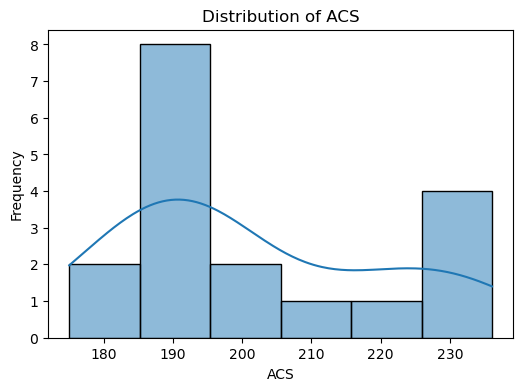

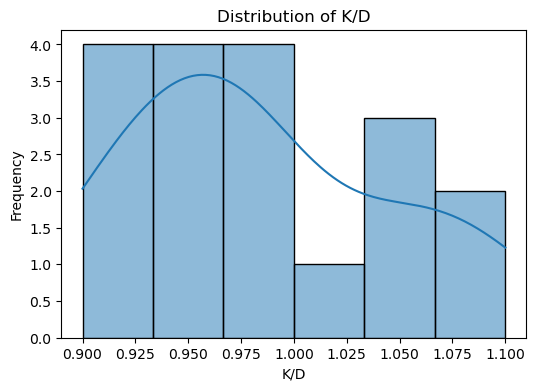

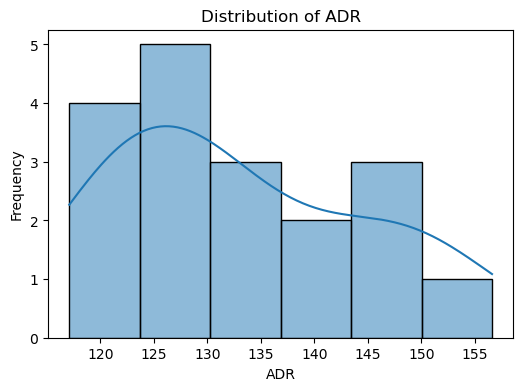

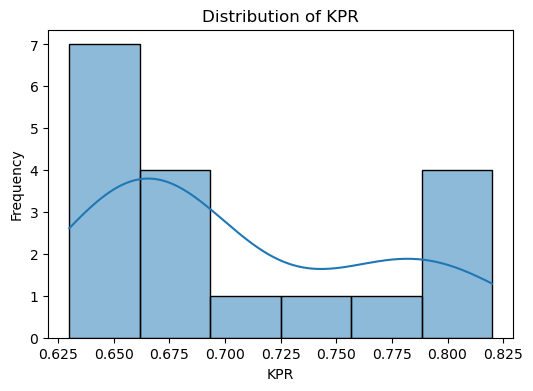

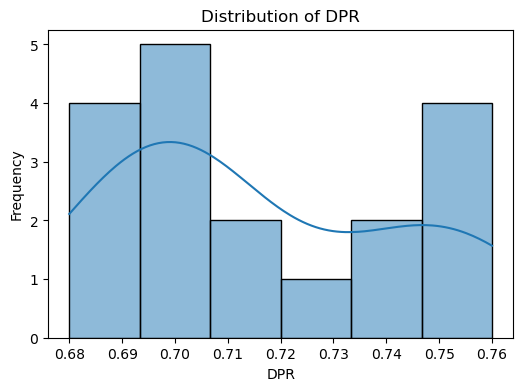

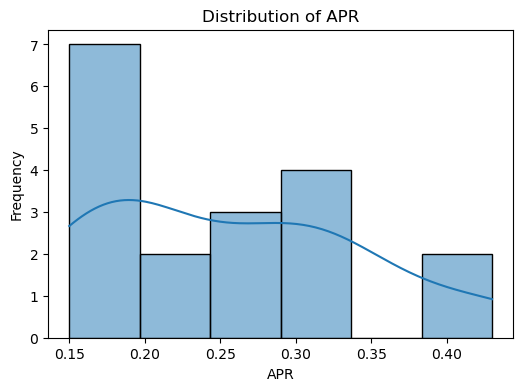

In [17]:
# 3.1.2 Summary statistics - Histograms

summary_stats = agents_data.describe()

# Distribution analysis using histograms for numerical attributes
numerical_attributes = ['pick_rate', 'rounds', 'rating', 'ACS', 'K/D', 'ADR', 'KPR', 'DPR', 'APR']
for attribute in numerical_attributes:
    plt.figure(figsize=(6, 4))
    sns.histplot(agents_data[attribute], kde=True)
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.show()


#### Findings:

* Distribution of Pick Rate - has a just slightly right-skewed data but it is fairly balance. There is also an outlier seen. 
* Distribution of Rounds - has slightlty right-skewed data. There is also an outlier seen. 
* Distribution of Rating - has no outliers and has a slightly right-skewed but not as much as the pick rate and rounds. 
* Distribution of Average Combat Score - has right-skewed data with no outliers.
* Distrbution of K/D, ADR, KPR, DPR, APR -  Showed patterns and central tendencies specific to each attribute. However, APR shows an outlier.

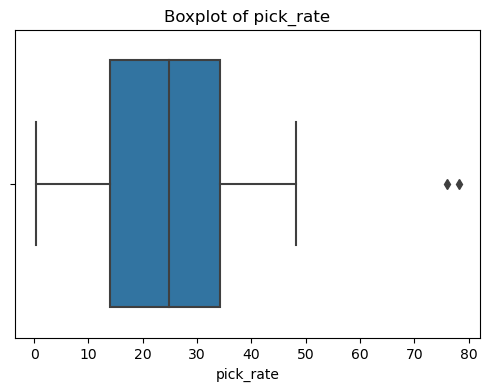

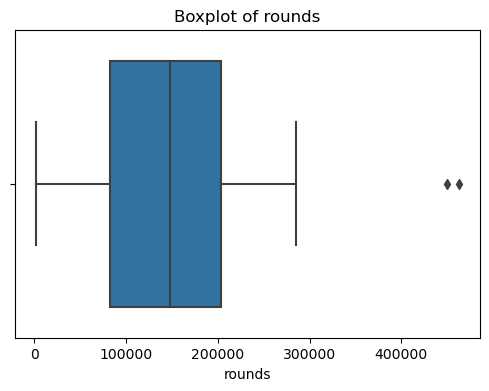

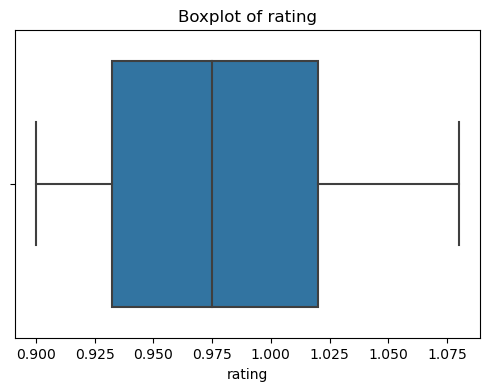

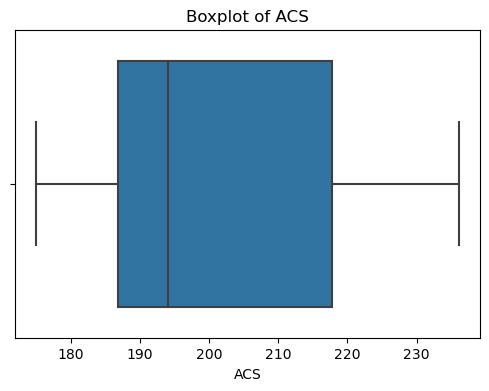

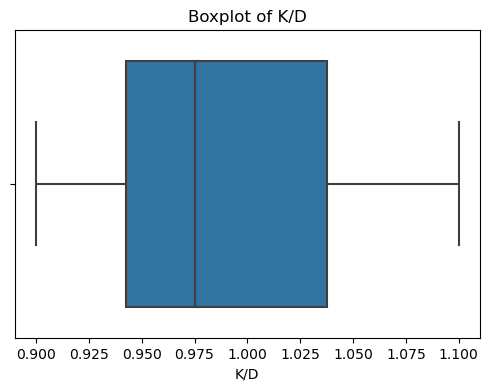

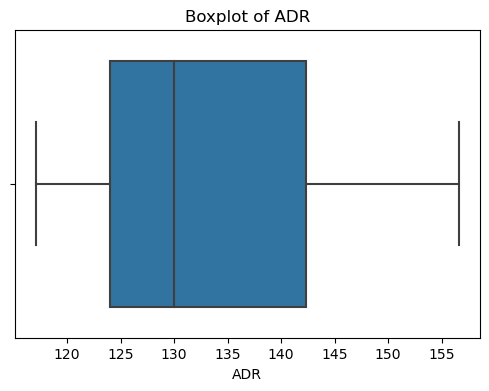

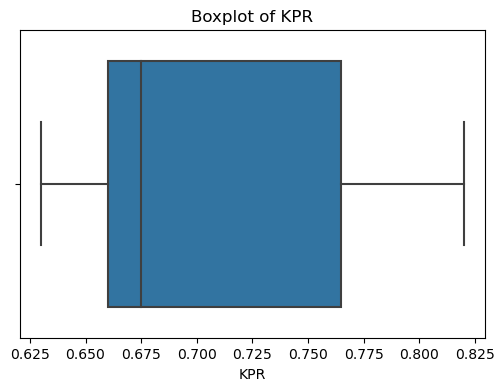

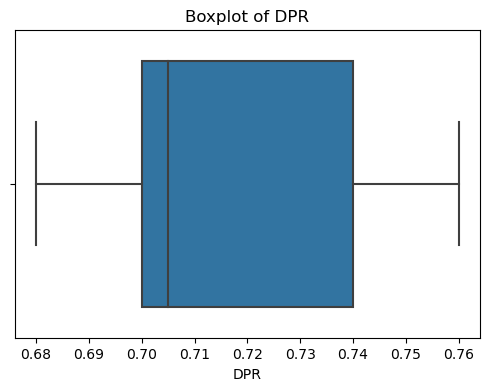

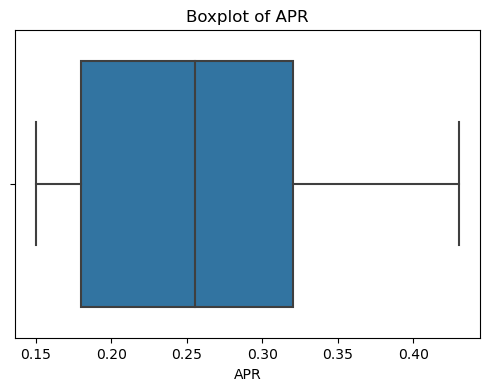

Outliers in pick_rate:
Empty DataFrame
Columns: [agent, pick_rate, rounds, rating, ACS, K/D, ADR, KPR, DPR, APR, FBPR, Role]
Index: []


In [18]:
# 3.1.3 Summary statistics - Boxplots

# Box plots for numerical attributes
for attribute in numerical_attributes:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=agents_data[attribute])
    plt.title(f'Boxplot of {attribute}')
    plt.xlabel(attribute)
    plt.show()

# Detect outliers using z-score (example for 'pick_rate')
z_scores = (agents_data['pick_rate'] - agents_data['pick_rate'].mean()) / agents_data['pick_rate'].std()
outliers = agents_data[(z_scores > 3) | (z_scores < -3)]
print("Outliers in pick_rate:")
print(outliers)


__Conclusion__

The analysis of various metrics revealed distinctive distributions within the dataset. The Pick Rate distribution displayed a nearly balanced distribution with a slight right-skew and the presence of an outlier. Similarly, the Rounds distribution exhibited a slightly right-skewed pattern with an outlier. Moreover, the Rating distribution, while slightly right-skewed, contained no outliers.

In contrast, the Average Combat Score distribution demonstrated a distinct right-skewed pattern without any outliers, indicating a concentration of agents with higher combat scores. Additionally, exploring K/D, ADR, KPR, DPR, and APR highlighted specific patterns and central tendencies unique to each metric, with APR showing an outlier among these metrics. Overall, these analyses showcased varying distributions and characteristics among the metrics, offering insights into the dataset's diversity and potential outliers across several key performance attributes.

__Correlational Analysis__

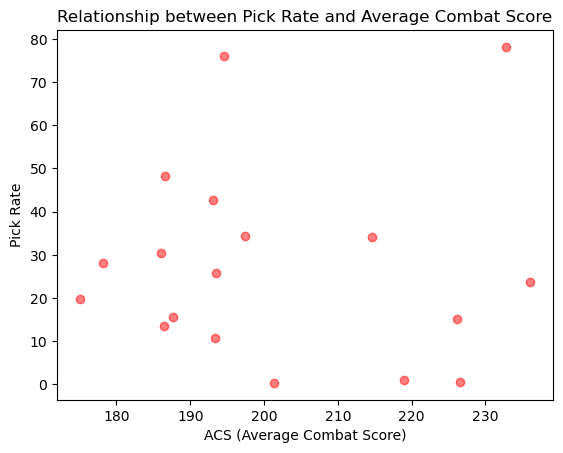

In [19]:
# Correlation Analysis using Scatter Plot

# Create a scatter plot
plt.scatter(agents_data['ACS'], agents_data['pick_rate'], color='red', alpha=0.5)

# Set the labels and title
plt.xlabel('ACS (Average Combat Score)')
plt.ylabel('Pick Rate')
plt.title('Relationship between Pick Rate and Average Combat Score')

# Display the plot
plt.show()


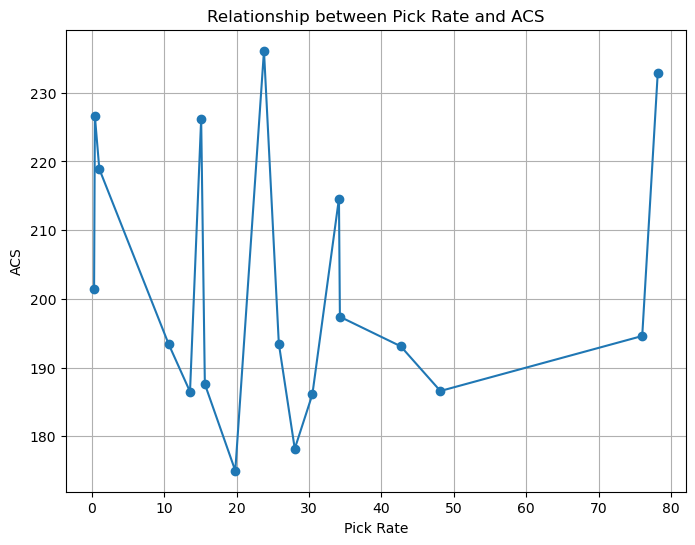

In [20]:
# Looking into the relationship using a line plot

plt.figure(figsize=(8, 6))
plt.plot(agents_data['pick_rate'], agents_data['ACS'], marker='o', linestyle='-')
plt.title('Relationship between Pick Rate and ACS')
plt.xlabel('Pick Rate')
plt.ylabel('ACS')
plt.grid(True)
plt.show()


**Conclusion** - There is no correlation between Pick Rate and Average Combat Score. The Average Combat Score (ACS) lacks consistency across various pick rates, indicating no evident connection between ACS and pick rates. This implies that a heightened ACS does not necessarily lead to increased agent selection.

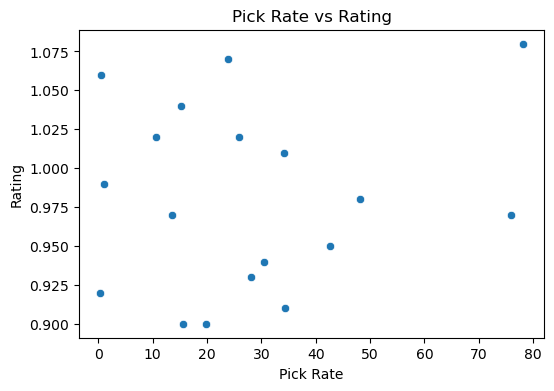

In [21]:
# Scatter plot for pick_rate vs rating
plt.figure(figsize=(6, 4))
sns.scatterplot(x='pick_rate', y='rating', data=agents_data)
plt.title('Pick Rate vs Rating')
plt.xlabel('Pick Rate')
plt.ylabel('Rating')
plt.show()

**Conclusion** - The correlation analysis indicates a limited to no correlation between Pick Rate and Rating. This implies that players do not primarily rely on an agent's rating when making their selection.

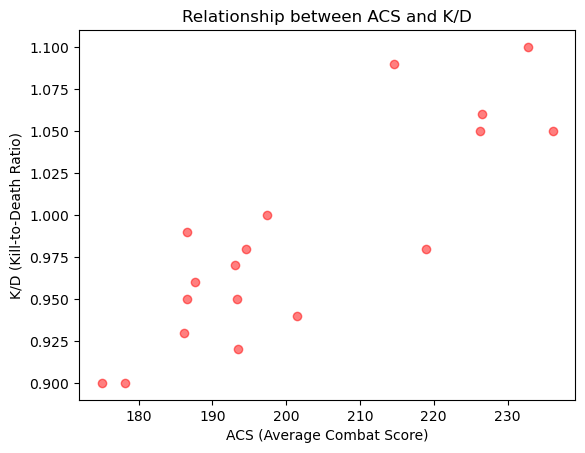

In [22]:
# Correlation Analysis

# Create a scatter plot
plt.scatter(agents_data['ACS'], agents_data['K/D'], color='red', alpha=0.5)

# Set the labels and title
plt.xlabel('ACS (Average Combat Score)')
plt.ylabel('K/D (Kill-to-Death Ratio)')
plt.title('Relationship between ACS and K/D')

# Display the plot
plt.show()


__Conclusion:__ As observed in the Scatter plot, there exists a slightly positive relationship between Average Combat Score (ACS) and Kill-to-Death Ratio (K/D). An increase in ACS is associated with a rise in K/D, indicating a simultaneous upward trend in both metrics.

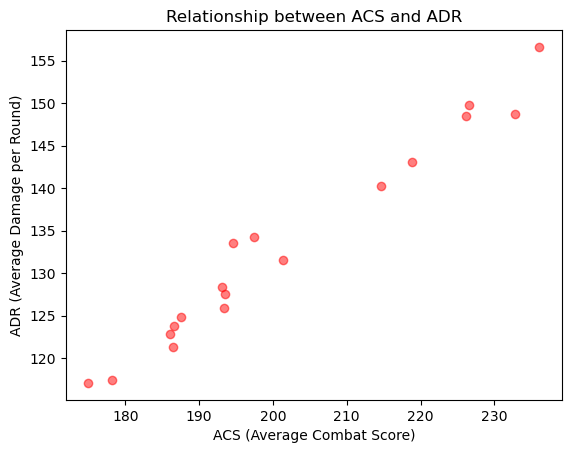

In [23]:
# Correlation Analysis

# Create a scatter plot
plt.scatter(agents_data['ACS'], agents_data['ADR'], color='red', alpha=0.5)

# Set the labels and title
plt.xlabel('ACS (Average Combat Score)')
plt.ylabel('ADR (Average Damage per Round)')
plt.title('Relationship between ACS and ADR')

# Display the plot
plt.show()


**Conclusion**: The scatter plot illustrates a positive correlation between Average Combat Score (ACS) and Average Damage per Round (ADR). This implies that players should consistently inflict moderate damage per round in the game to attain a higher ACS.

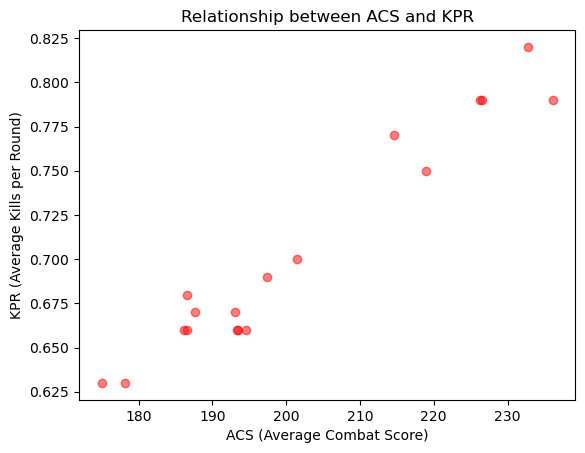

In [24]:
# Correlation Analysis

# Create a scatter plot
plt.scatter(agents_data['ACS'], agents_data['KPR'], color='red', alpha=0.5)

# Set the labels and title
plt.xlabel('ACS (Average Combat Score)')
plt.ylabel('KPR (Average Kills per Round)')
plt.title('Relationship between ACS and KPR')

# Display the plot
plt.show()


**Conclusion**: The scatter plot illustrates a positive correlation between Average Combat Score (ACS) and Average Kills per Round (KPR). This implies that players should consistently have kills per round in the game to attain a higher ACS.

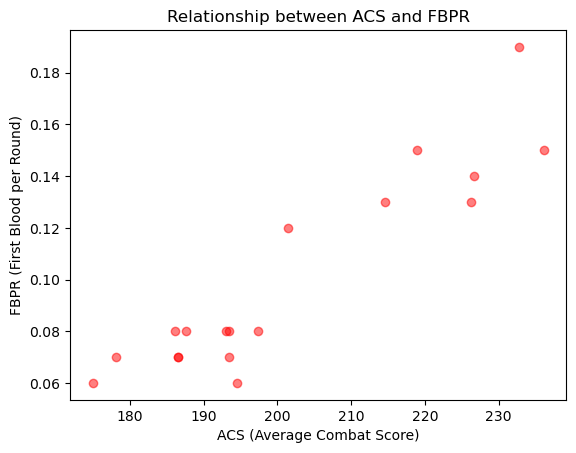

In [25]:
# Correlation Analysis

# Create a scatter plot
plt.scatter(agents_data['ACS'], agents_data['FBPR'], color='red', alpha=0.5)

# Set the labels and title
plt.xlabel('ACS (Average Combat Score)')
plt.ylabel('FBPR (First Blood per Round)')
plt.title('Relationship between ACS and FBPR')

# Display the plot
plt.show()


**Conclusion**: The scatter plot illustrates a moderately positive correlation between Average Combat Score (ACS) and First Bloods per Round (FBPR). 

__Correlation Matrix__

The correlation matrix serves as a powerful tool in Exploratory Data Analysis (EDA) by unveiling intricate relationships and dependencies between variables within a dataset. Utilising the correlation matrix allows for a comprehensive examination of the strength and direction of associations among various metrics, aiding in identifying significant patterns and insights crucial for understanding the dataset's underlying structure and interrelationships.

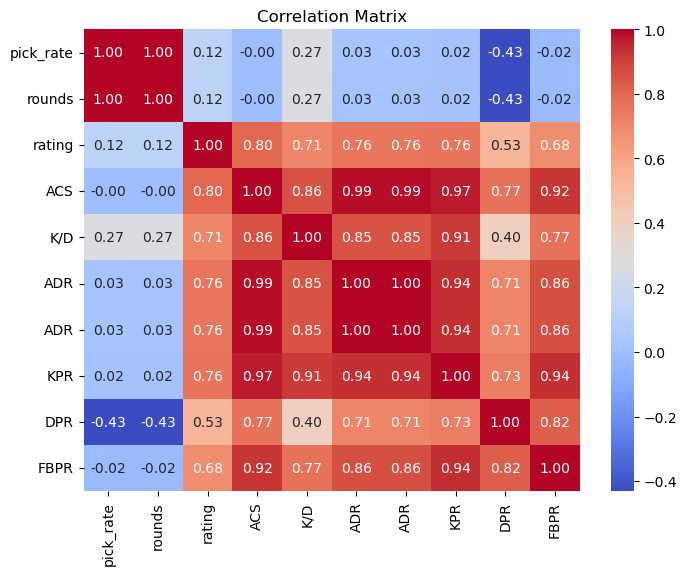

In [26]:
# Define the columns to include in the subset
selected_columns = ['pick_rate','rounds','rating','ACS','K/D','ADR','ADR','KPR',
                         'DPR','FBPR']

# Convert 'pick_rate' column to numeric (if it contains numerical values)
agents_data['pick_rate'] = pd.to_numeric(agents_data['pick_rate'], errors='coerce')

# Handle missing or non-numeric values in 'pick_rate' column
agents_data['pick_rate'].fillna(agents_data['pick_rate'].mean(), inplace=True)

# Create a subset of the data with the selected columns
subset_data = agents_data[selected_columns]

# Calculate the correlation matrix and plot the heatmap
correlation_matrix = subset_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Using correlation matrix helps summarize and present the strength and direction of relationships between various variables in the dataset. The correlation coefficient values range from -1 to 1. 

Based on Findings: 

* The correlation matrix indicates that there is a weak to no correlation of Pick Rate and Average Combat Score (ACS), suggesting that the top picked agents do not have the highest Average Combat Score (ACS) and players do not base on the ACS when choosing an agent. 
* We can observe that there is ACS has a strong relationship with Average Damage cause per Round (ADR), Average kills per Round (KPR), and First Blood Success Rate (FBPR). 

## Part 4: Data Visualisation 

This segment of Data Visualization presents a collection of diverse visualizations meticulously crafted using libraries like Matplotlib and Seaborn. These visual representations act as insightful snapshots, offering nuanced perspectives and illuminating insights gleaned from the dataset.

### What are the most played agents in the game?

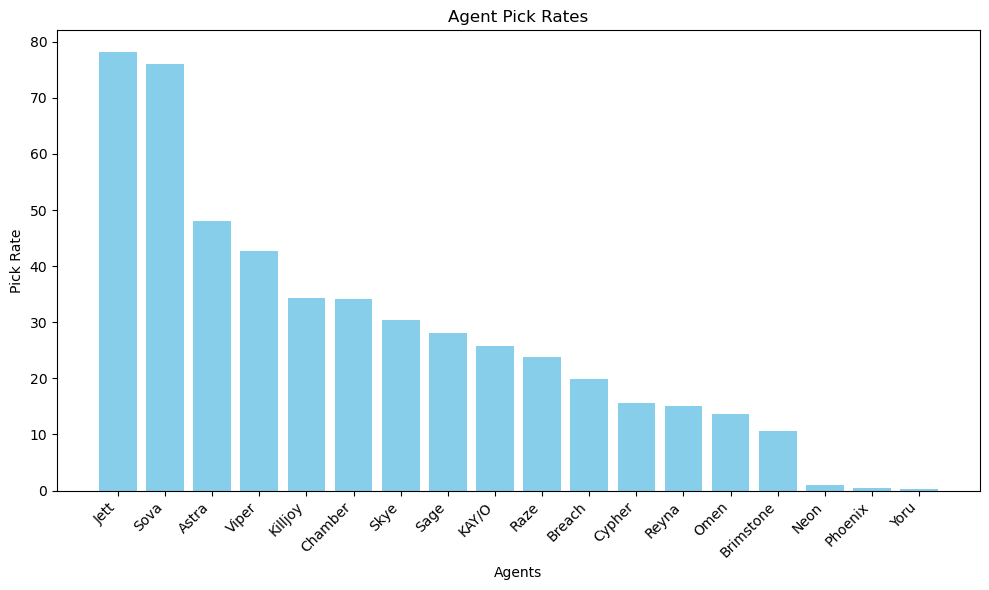

In [27]:
# Subset the necessary columns
agent_pick_rates = agents_data[['agent', 'pick_rate']]

# Sort agents by pick rates in descending order
sorted_agents = agent_pick_rates.sort_values('pick_rate', ascending=False)

# Plotting a bar plot for agent pick rates
plt.figure(figsize=(10, 6))
plt.bar(sorted_agents['agent'], sorted_agents['pick_rate'], color='skyblue')
plt.title('Agent Pick Rates')
plt.xlabel('Agents')
plt.ylabel('Pick Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

__Conclusion__

In summary, the bar plot analysis illustrates that Jett, Sova, and Astra emerge as the top three frequently chosen agents in the game. Categorizing them by roles reveals their prominence in specific categories: Jett as a prevalent Duelist, Astra among Controllers, Killjoy representing Sentinels, and Sova as a prominent Initiator. This visualization effectively showcases the popularity of certain agents and their distribution across distinct roles within the game.

__Top 5 Agent Metrics (ACS,K/D,ADR)__

Creating a summary analysis specifically for the top 5 agent metrics—ACS (Average Combat Score), K/D (Kill/Death Ratio), and ADR (Average Damage per Round)—serves the purpose of highlighting the performance characteristics of the top-ranking agents. This focused analysis aims to delve deeper into the attributes that contribute significantly to the agents' effectiveness or impact within the game.

By concentrating on these specific metrics for the top agents, it offers insights into their combat proficiency, survivability, and damage output compared to other agents. It allows for a more detailed examination of the top performers, helping to identify trends or distinguishing features that set them apart. Understanding these key performance metrics for the top-ranking agents provides valuable information for players, analysts, or game enthusiasts seeking to comprehend the gameplay dynamics or strategize more effectively.

In essence, this summary analysis allows for a targeted exploration of crucial performance indicators among the top agents, facilitating a better understanding of their strengths and capabilities in the game environment.

In [28]:
# Sorting the agents based on pick rates
top_picked_agents = agents_data.sort_values('pick_rate', ascending=False).head(5)

# Analyzing association metrics (ACS, K/D, ADR) for the top five most picked agents
summary_analysis = top_picked_agents[['agent', 'ACS', 'K/D', 'ADR']]

# Displaying the summary analysis
print(summary_analysis)


     agent    ACS   K/D    ADR
0     Jett  232.8  1.10  148.7
1     Sova  194.6  0.98  133.5
2    Astra  186.6  0.99  123.8
3    Viper  193.1  0.97  128.4
4  Killjoy  197.4  1.00  134.3


__Visualisation of Top 5 Agent and their Metrics__

Visualizing the top 5 agent metrics (ACS, K/D, and ADR) for the top-ranking agents offers a more intuitive and graphical representation of their performance attributes. While summary statistics provide numerical insights, visualization enhances comprehension by presenting data in a visual format.

Visual representations, barchart, allow for easier comparisons and identification of patterns or trends among the top agents. They offer a clear and immediate understanding of the performance differences or similarities across these key metrics. This visual insight aids in quickly identifying which agents excel in specific areas like combat score, kill-to-death ratio, or damage output per round.

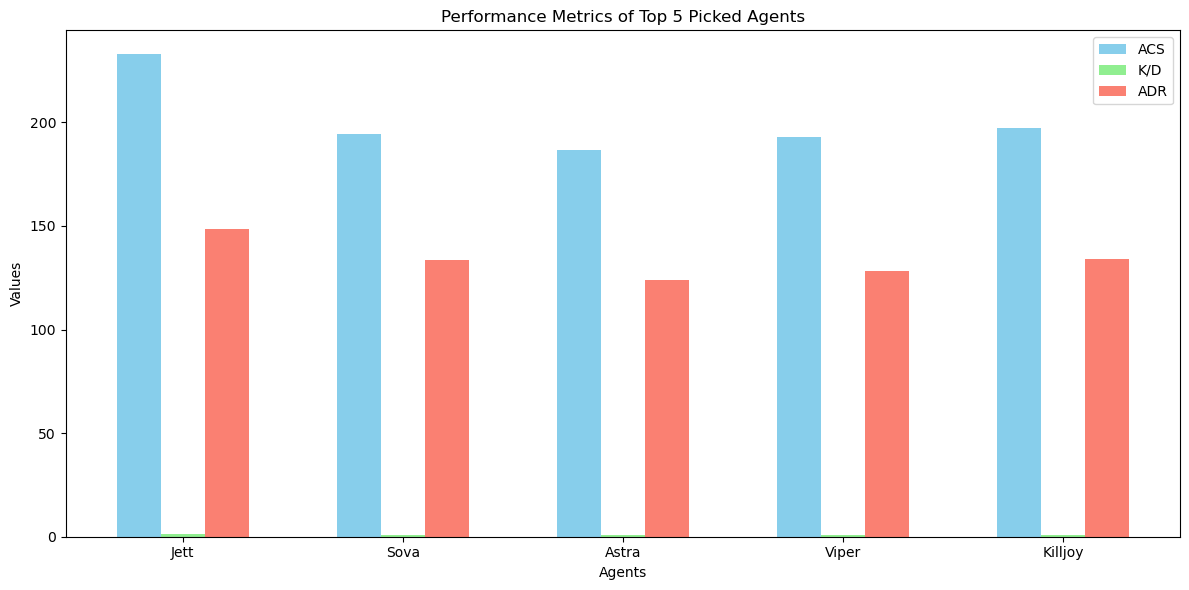

In [29]:
# Sorting the agents based on pick rates
top_picked_agents = agents_data.sort_values('pick_rate', ascending=False).head(5)

# Subset data for the top 5 picked agents
agents = top_picked_agents['agent'].tolist()

# Prepare data for plotting
acs_values = top_picked_agents['ACS']
kd_values = top_picked_agents['K/D']
adr_values = top_picked_agents['ADR']

# Set up the plot
plt.figure(figsize=(12, 6))

# Plotting ACS, K/D, ADR for the top 5 picked agents
plt.bar([i - 0.2 for i in range(len(agents))], acs_values, width=0.2, label='ACS', color='skyblue')
plt.bar([i for i in range(len(agents))], kd_values, width=0.2, label='K/D', color='lightgreen')
plt.bar([i + 0.2 for i in range(len(agents))], adr_values, width=0.2, label='ADR', color='salmon')

plt.xlabel('Agents')
plt.ylabel('Values')
plt.title('Performance Metrics of Top 5 Picked Agents')
plt.legend()
plt.xticks(range(len(agents)), agents)

plt.tight_layout()
plt.show()


__Looking in a Different Diagram Format__

Upon reviewing the bar plot provided, it appears that the Kill-to-Death Ratio (K/D) metric isn't adequately visualised. To gain a clearer understanding and perform a more in-depth analysis of this diagram, it's imperative to segregate the metrics for a more detailed examination.

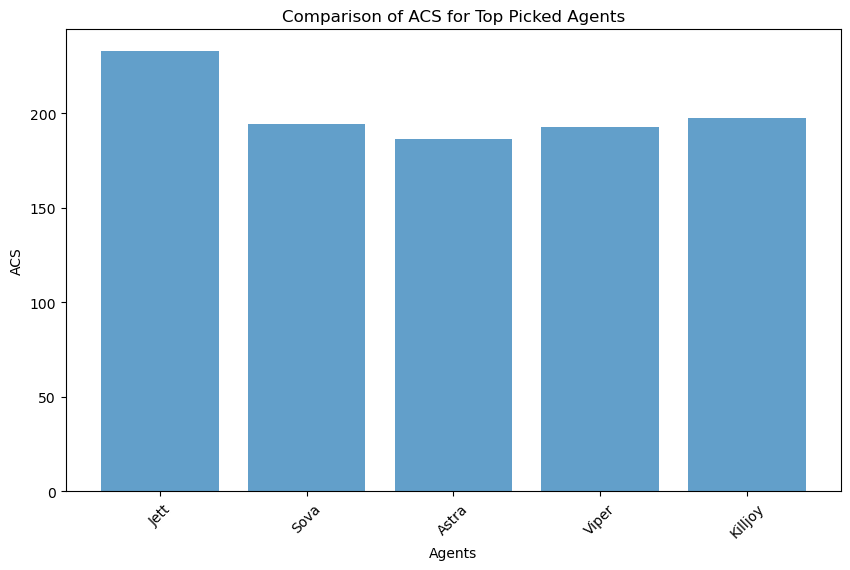

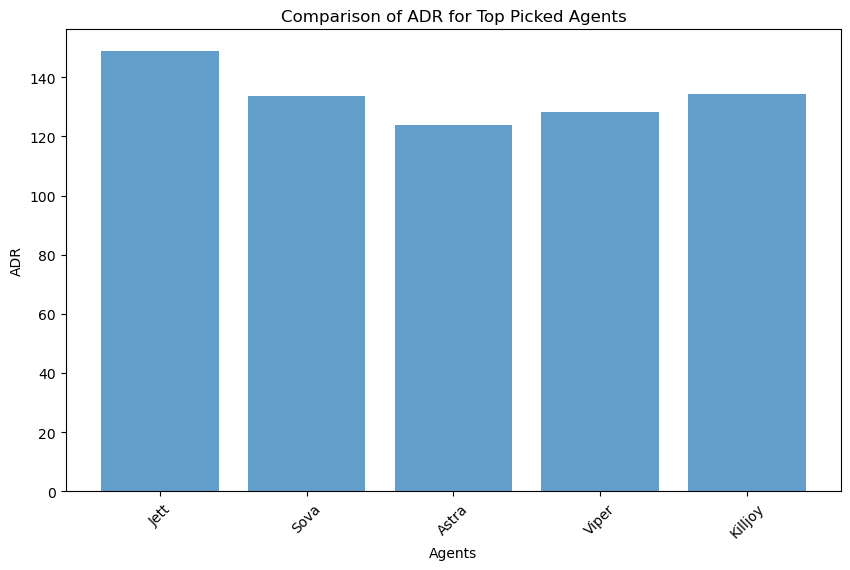

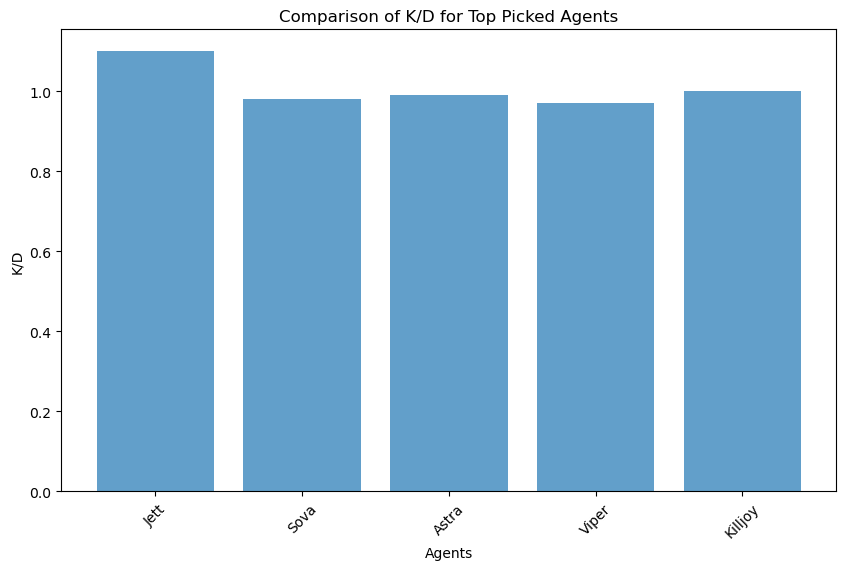

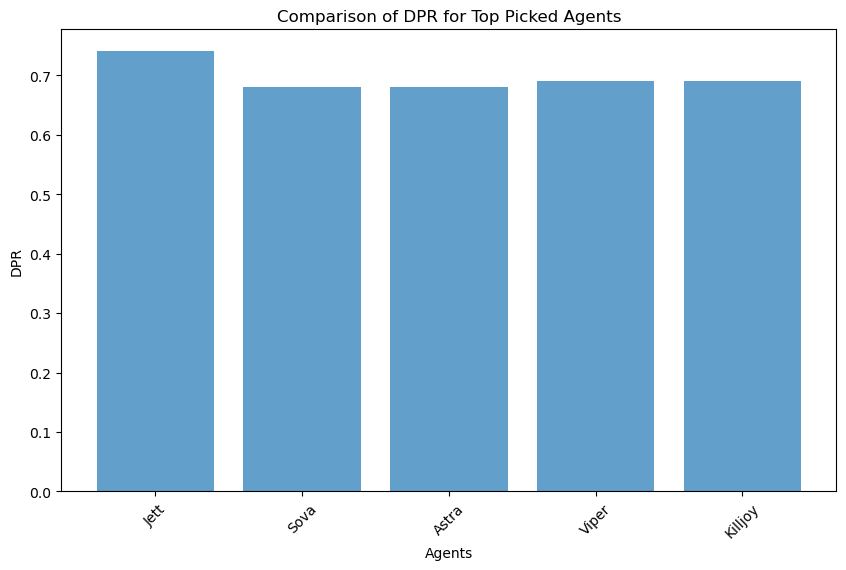

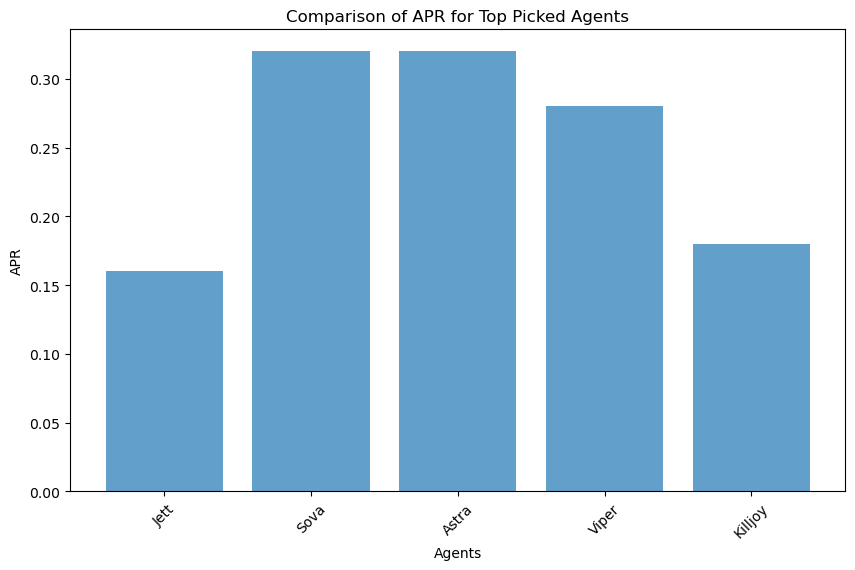

In [30]:
# Selecting specific agents
selected_agents = ['Jett', 'Sova', 'Astra', 'Killjoy', 'Viper']
metrics = ['ACS', 'ADR', 'K/D','DPR','APR']  # Add more metrics if needed

# Filtering data for selected agents and metrics
selected_data = agents_data[agents_data['agent'].isin(selected_agents)][['agent'] + metrics]

# Creating side-by-side bar plots for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(selected_data['agent'], selected_data[metric], alpha=0.7)
    plt.title(f'Comparison of {metric} for Top Picked Agents')
    plt.xlabel('Agents')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()


Based on Findings:

- In terms of Average Combat Score (ACS) among the top-picked agents, Jett, classified as a Duelist, exhibits the highest combat score, while Astra, categorised as a Controller, demonstrates the lowest ACS.

- Comparison of the Average Damage per Round (ADR) for the top-picked agents reveals that Jett, operating as a Duelist, registers the highest damage per round, whereas Astra, positioned as a Controller, showcases the lowest ADR.

- The Kill-to-Death Ratio (K/D) comparison among the top-picked agents indicates that Jett, functioning as a Duelist, holds the highest K/D Ratio. Conversely, Viper, identified as a Controller, portrays the lowest ratio, closely followed by Sova, an Initiator.

- When considering the Average Damage Caused per Round (DPR), Jett maintains the highest damage inflicted per round, continuing to dominate as a Duelist. Conversely, Sova records the lowest damage caused per round among the top-picked agents.

- Evaluating the Average Amount of Assists per Round (APR), both Sova and Astra display closely competing high averages, while Jett exhibits the least average number of assists per round among the analysed top-picked agents.

### What Role has the highest Average Combat Score? 

         Role         ACS     K/D         ADR
0  Controller  189.900000  0.9650  124.850000
1     Duelist  223.666667  1.0300  146.383333
2   Initiator  187.300000  0.9325  125.225000
3    Sentinel  194.450000  0.9875  129.200000


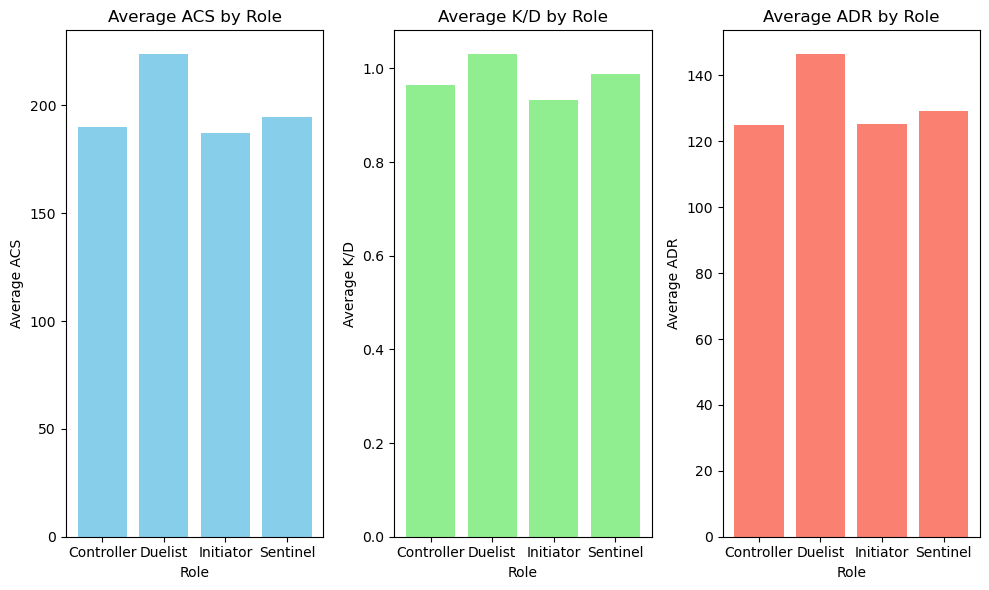

In [31]:
# Create a subset of the data with relevant columns
role_metrics = agents_data[['Role', 'ACS', 'K/D', 'ADR']]

# Group by 'Role' and calculate the average metrics for each role
average_role_metrics = role_metrics.groupby('Role').mean().reset_index()

# Print the average metrics for each role
print(average_role_metrics)

# Plotting average performance metrics for each role
plt.figure(figsize=(10, 6))

# ACS
plt.subplot(1, 3, 1)
plt.bar(average_role_metrics['Role'], average_role_metrics['ACS'], color='skyblue')
plt.title('Average ACS by Role')
plt.xlabel('Role')
plt.ylabel('Average ACS')

# K/D
plt.subplot(1, 3, 2)
plt.bar(average_role_metrics['Role'], average_role_metrics['K/D'], color='lightgreen')
plt.title('Average K/D by Role')
plt.xlabel('Role')
plt.ylabel('Average K/D')

# ADR
plt.subplot(1, 3, 3)
plt.bar(average_role_metrics['Role'], average_role_metrics['ADR'], color='salmon')
plt.title('Average ADR by Role')
plt.xlabel('Role')
plt.ylabel('Average ADR')

plt.tight_layout()
plt.show()


Different agent roles showcase specific performance patterns: Duelists adopt an aggressive, high-damage approach, Sentinels prioritize support and defense, Controllers maintain a balanced strategy, and Initiators serve as a link between starting conflicts and engaging in combat. These observations underscore the role-based strengths and limitations that significantly influence overall agent performance within Valorant. Based on the findings, we can conclude that if a player wants to rank up faster, they should choose to play duelist because it gives out the highest combat score out of all. 

### Is the best agent the most played agent in the game?

The exploration into the relationship between the most played and best-performing agents begins with a focus on the Average Combat Score (ACS), a comprehensive metric encompassing factors like kills, deaths, assists, spike plants, and initial eliminations awarded to players post-match. 

Visualizing the ACS through a bar plot across various agents reveals consistent values without clear correlations between agent pick rates and ACS. Despite the pivotal role of ACS in determining match and team MVPs, its high value doesn't necessarily drive higher agent selection. For instance, while agents like Phoenix exhibit a high ACS, they aren't frequently chosen. The observation that Duelists, emphasizing securing kills, showcase the highest ACS underlines the role-specific influence on this metric. These insights collectively suggest that while ACS signifies player performance, other factors beyond pure metrics contribute to agent selection. Consequently, the best-performing agent, as measured by ACS, might not consistently align with the most played agent, showcasing a nuanced relationship between performance metrics and player preferences in agent selection.

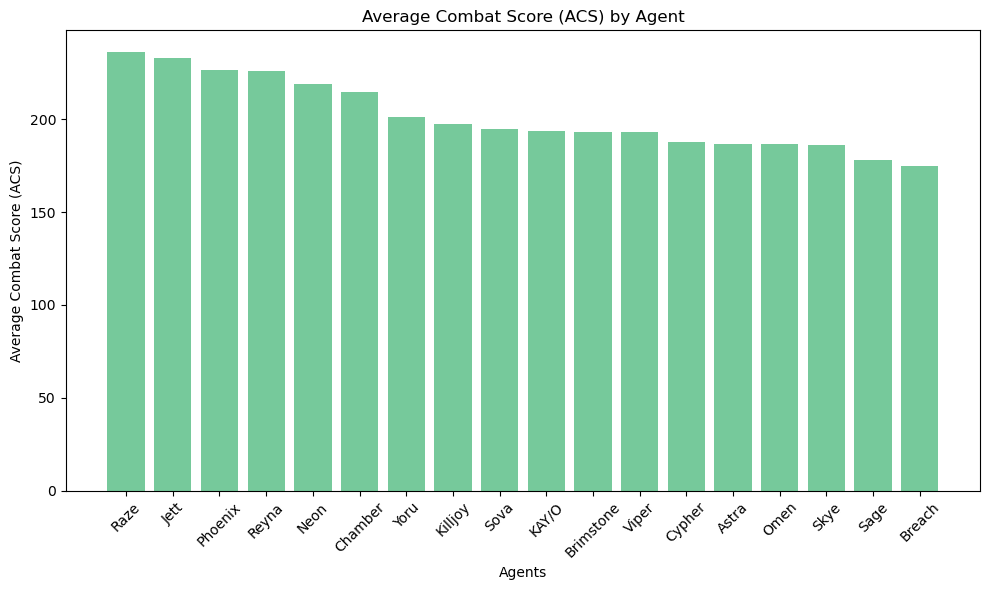

In [32]:
# Sort the agents_data by ACS in descending order
agents_data_sorted = agents_data.sort_values(by='ACS', ascending=False)

# Create the bar plot with sorted data
plt.figure(figsize=(10, 6))
plt.bar(agents_data_sorted['agent'], agents_data_sorted['ACS'], alpha=0.7, color='mediumseagreen')
plt.xlabel('Agents')
plt.ylabel('Average Combat Score (ACS)')
plt.title('Average Combat Score (ACS) by Agent')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Based on the bar plot depicting the Average Combat Score (ACS) for each agent, several observations can be made:

1. Consistency Across Agents: The ACS values across different agents appear to be relatively consistent. There are no significant peaks or troughs, indicating that agents, in general, contribute comparably to the Average Combat Score.

2. Lack of Clear Relationship: The slight alignment of bars suggests that there is no distinct relationship between specific agents and their ACS. Unlike some visualizations where certain agents might stand out, the uniformity in bar heights implies that the choice of agent alone may not be a decisive factor in determining the ACS.

3. Agent Selection Not ACS-Driven: The absence of a clear pattern reinforces the idea that higher ACS values do not necessarily drive the selection of a particular agent. Players seem to make agent choices independent of the potential impact on the ACS metric.

In conclusion, while the ACS is an essential metric for evaluating player performance in the game, the bar plot suggests that for the choice of agents, ACS may not be a major influencing factor. Players seem to adapt their agent selections based on other considerations, and ACS alone may not be the sole criterion in the decision-making process. Aside from Jett in the most picked agents, Sova and Astra are also the most frequently chosen agents, it might be assumed that they also would possess the highest Average Combat Scores (ACS) based on the statistics. However, this data indicates that the top-performing agents in the game might not necessarily align with the most commonly selected ones.

### Looking at a Different Perspective: Average Damage per Round (ADR)

The code begins by sorting the dataset, 'agents_data,' based on the Average Damage per Round (ADR) metric in descending order. This sorting process organizes the agents' data according to their ADR from highest to lowest. The resulting bar plot, created using Matplotlib, illustrates the ADR attributed to each agent. Each bar on the plot represents an individual agent, with the x-axis denoting the agents' names and the y-axis displaying their respective ADR values. The visualization's title, "Average Damage per Round (ADR) by Agent," provides context regarding the plotted metric and its attribution to each agent. The use of a bar plot is particularly effective in this context as it allows for a straightforward comparison of ADR values among different agents, facilitating an immediate understanding of each agent's contribution in terms of damage dealt per round. The chosen color scheme and layout adjustments enhance the visual clarity and presentation of the ADR data for better comprehension.

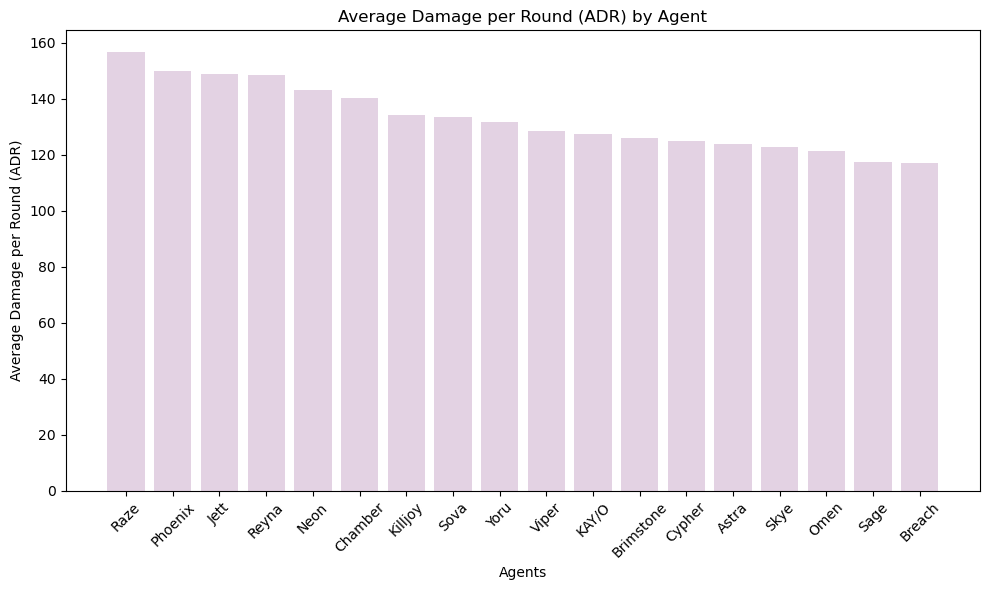

In [33]:
# Sort the agents_data by ADR in descending order
agents_data_sorted = agents_data.sort_values(by='ADR', ascending=False)

# Create the bar plot with sorted data
plt.figure(figsize=(10, 6))
plt.bar(agents_data_sorted['agent'], agents_data_sorted['ADR'], alpha=0.7, color='thistle')
plt.xlabel('Agents')
plt.ylabel('Average Damage per Round (ADR)')
plt.title('Average Damage per Round (ADR) by Agent')
plt.xticks(rotation=45)  
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Based on the bar plot depicting the Average Damage per Round (ADR) for each agent, several observations can be made:


1. ADR and Agent Selection: Similar to the ACS analysis, there appears to be a weak relationship between the Average Damage per Round (ADR) and agent pick rates. Notably, agents with higher ADR values, such as Raze, don't consistently exhibit high pick rates.

2. Duelists and ADR: Observations show that most duelists tend to achieve higher ADR values. This aligns with our previous findings regarding the Average Combat Score (ACS), suggesting a pattern where duelists often excel in metrics related to damage dealt per round.

In summary, while the ADR metric showcases potential differences among agents, it doesn't seem to be a driving force in influencing agent selection. Additionally, the tendency of duelists to exhibit higher ADR values aligns with their performance in other combat-related metrics, reinforcing their prowess in dealing damage per round.

### Kill-to-Death Ratio (K/D)

Similarly, a bar plot is generated utilizing Matplotlib, depicting the K/D associated with each agent. Within the plot, each bar signifies an individual agent, with the x-axis representing the agents' names and the y-axis displaying their corresponding K/D values. The plot's title, "Kills to Death Ratio by Agents," aptly conveys the subject of the visualization—highlighting the ratio of kills to deaths for each agent. The choice of a bar plot is optimal in this context as it allows for a direct comparison of K/D ratios among different agents, facilitating a clear understanding of each agent's effectiveness in securing kills relative to their deaths. Furthermore, adjustments in color, layout, and spacing contribute to the visual appeal and readability of the K/D data, aiding viewers in quickly assessing and comparing the performance metrics across various agents.

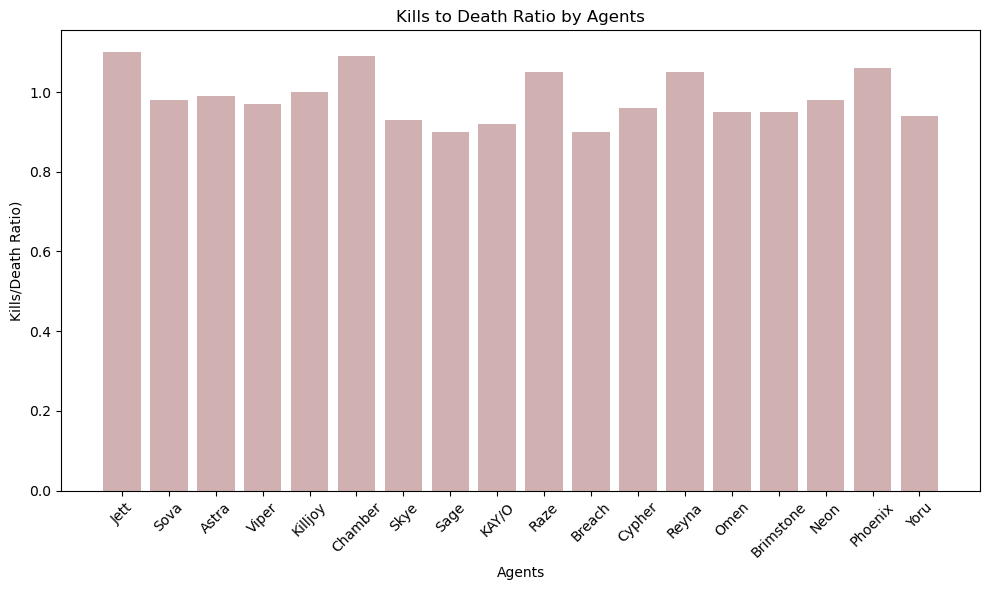

In [34]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(agents_data['agent'], agents_data['K/D'], alpha=0.7, color='rosybrown')
plt.xlabel('Agents')
plt.ylabel('Kills/Death Ratio)')
plt.title('Kills to Death Ratio by Agents')
plt.xticks(rotation=45)  
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Based on the bar plot depicting the Kills/Death (K/D) for each agent, several observations can be made:

1. Consistency in K/D: Across various agents, the Kills/Deaths Ratio (K/D) tends to hover around or near one, indicating a balance between kills and deaths. This equilibrium might stem from the strategic gameplay required to secure kills without excessively risking deaths in enemy-dominated areas.

1. Agents with High K/D Ratios: Notably, Jett, Chamber, Phoenix, Raze, and Reyna emerge with the highest K/D ratios among agents. These agents, known for their potent ultimate abilities, often offer players opportunities to eliminate multiple enemies, contributing to their higher K/D ratios.

In essence, while the K/D ratio doesn't showcase significant variation among agents and typically maintains a balance near one, certain agents stand out with notably higher ratios, often attributed to their powerful ultimate abilities that facilitate multiple enemy eliminations.

### Average Kills, Deaths and Assistences per Round

Finally, we will visualize the mean kills per round (KPR), deaths per round (DPR), and assists per round (APR) for every agent. Using bar plot allows the author for a clear comparison of multiple categories for each agent side by side. 


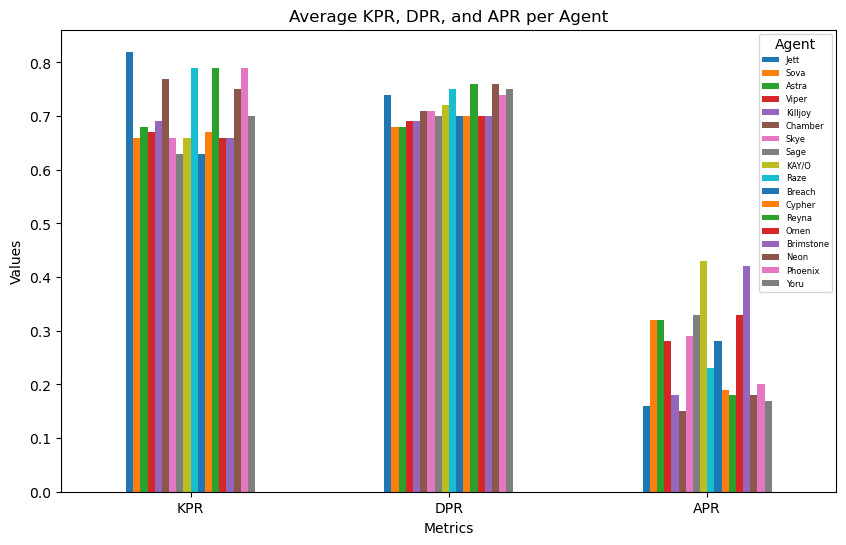

In [35]:
# Subset the necessary columns
subset_data = agents_data[['agent', 'KPR', 'DPR', 'APR']]

# Set 'Agent' column as the index
subset_data.set_index('agent', inplace=True)

# Transpose the DataFrame for easy plotting
subset_data.T.plot(kind='bar', figsize=(10, 6))
plt.title('Average KPR, DPR, and APR per Agent')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=0)  
plt.legend(title='Agent')

# Adjust legend font size
plt.legend(title='Agent', prop={'size': 6})  

plt.show()


### Same plot but in different format for better analysation:

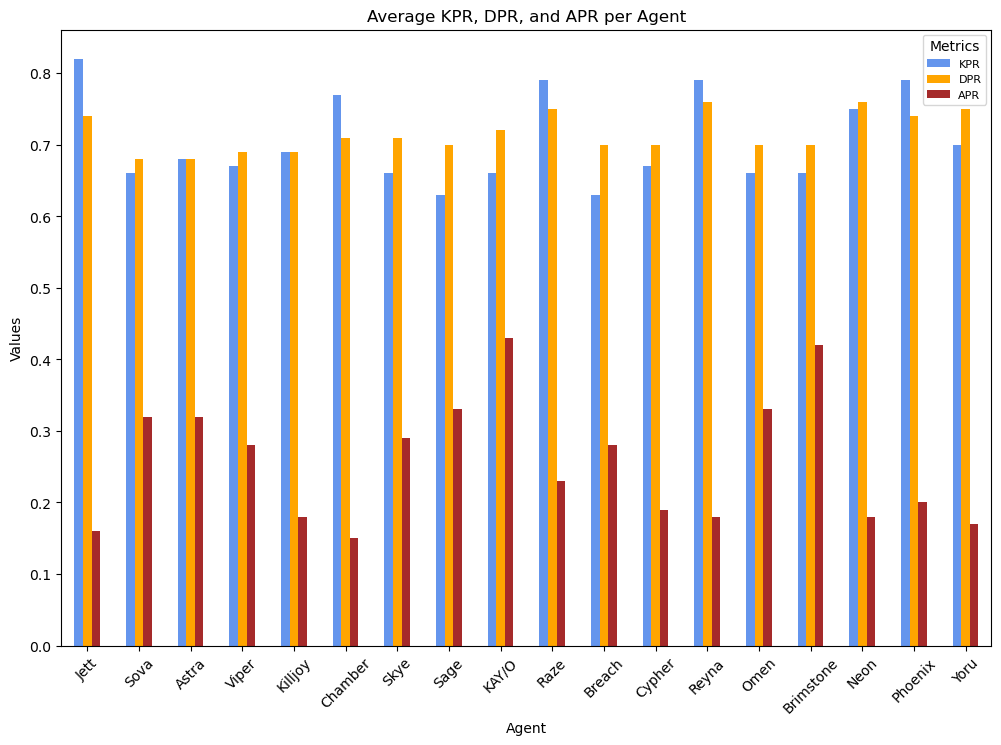

In [36]:
# Subset the necessary columns
subset_data = agents_data[['agent', 'KPR', 'DPR', 'APR']]

# Set 'agent' column as the index
subset_data.set_index('agent', inplace=True)

# Define custom colors for the plot
colors = ['cornflowerblue', 'orange', 'brown']

# Plotting
subset_data.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Average KPR, DPR, and APR per Agent')
plt.xlabel('Agent')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-labels for readability
plt.legend(title='Metrics')

# Adjust legend font size
plt.legend(title='Metrics', prop={'size': 8})  

plt.show()


In a broader context, duelists consistently exhibit heightened Kill Per Round (KPR) statistics. Notably, Jett, Raze, Reyna, and Phoenix emerge among the top four agents in terms of KPR metrics. However, this subset of agents notably lacks high Average Assists Per Round (APR) scores.

Conversely, the agents ranking highest in APR, listed in descending order, include KAY/O, Brimstone, Sage, and Omen. KAY/O's arsenal comprises abilities that render adversaries vulnerable, while Brimstone demonstrates proficiency in deploying combat stim and smoke coverage. Sage contributes substantial healing capacities to both herself and allies, and Omen tactically disrupts opponents with blinding smokes.

Interestingly, agents specializing in healing, exemplified by Sage and Skye, display relatively elevated APR values. Nonetheless, they do not occupy the foremost positions in this metric.

Damage Per Round (DPR) showcases consistent values across all agents, with a marginal escalation observed among duelists. This slight elevation in DPR among duelists likely corresponds to their designated roles within the game, aligning with previously discussed observations.

## Part 5: Data Storytelling

The dataset chosen provides a comprehensive view of Valorant agents, encompassing critical metrics such as pick rates, rounds played, agent ratings, and the pivotal Average Combat Score (ACS). This key metric, influenced by K/D ratio, ADR, KPR, DPR, APR, FDPR, and FBSR, reflects player performance within the game. In valorant, the agents are also categorized into four roles which are Duelist, Controller, Initiator, and Sentinel. In further analysation, we can see how these roles affect the player's average combat score in the game.

#### Dataset Exploration and Refinement:

The dataset underwent meticulous cleaning to ensure precision in analysis, eliminating missing values, data duplication, irrelevant columns such as 'HS%', 'FBSR%', and 'FDPR' that will not be used in the analysation, and converting the 'pick_rate' column into a numerical for analysation. Additionally, a new 'Role' column specifying each agent's role was added for more in-depth exploration. 

### Data Analysis:

**1. Summary Statistics** 

The chosen visualisation for the Exploratory Data Analysis are both histograms and boxplots which serve as effective visualization tools for analysing and comparing distinct distributions among various metrics. Histograms offer insights into the distribution of a single continuous variable, delineating the frequency distribution across intervals or "bins" along the x-axis and depicting the frequency or count on the y-axis. They illuminate the shape, central tendency, and spread of a metric's distribution, aiding in identifying skewness and variability. On the other hand, boxplots present a summarized view of data distributions, showcasing the median, quartiles, and potential outliers. They excel in comparing multiple variables or distributions across different categories or agents, providing insights into central tendency, spread, and outlier presence. By utilizing histograms and boxplots together, it becomes possible to comprehensively compare and discern variations in the distributional characteristics among the metrics or groups being evaluated.

With the use of histograms and boxplot the analysis of various metrics unveils distinct distributions among Valorant metrics showed great findings. The Pick Rate distribution demonstrates a nearly symmetrical spread, hinting at a balanced representation within the dataset. Its histogram displays a central peak, indicating the majority of agents fall within a moderate pick rate range. However, a slight right skew suggests the presence of a few agents with notably higher pick rates and an outlier, thus aligning with the expected variability across agent popularity.

Similarly, the distribution of Rounds played exhibits a slightly right-skewed pattern, also featuring an outlier. This distribution, though somewhat skewed, aligns moderately with the expected spread, indicating varying engagement levels among agents. Moving to the Rating distribution, no outliers were detected, and it displayed a marginally right-skewed pattern, albeit less pronounced than the Pick Rate and Rounds distributions. This distribution signifies a relatively balanced representation of agent ratings within the dataset. Contrastingly, the distribution of Average Combat Score (ACS) portrays a distinct right-skewed pattern without any outliers, indicative of a concentration of agents with comparatively higher combat scores.

Further exploration into K/D, ADR, KPR, DPR, and APR distributions uncovered specific patterns and central tendencies unique to each attribute. Notably, the APR distribution revealed an outlier within the dataset. Also, K/D and ADR exhibits a slightly right-skewed which we can impose that agents has an effect into get higher K/D ratio in the game. On the other hand, KPR and DPR also shows a distinct right-skewed pattern which shows that the choosing an agent affects the player's average kills per round and damage per round. Lastly, APR shows a slightly negatively skewed in box plot and an outlier was seen in the histogram.

Despite these nuances, the summary statistics collectively depict a diverse spread of agent metrics, providing a comprehensive understanding of the varied performance and engagement levels among Valorant agents.

**2. Correlational Analysis and Matrix** 

The analysis of correlations within the Valorant dataset uncovers intricate connections among various metrics, offering valuable insights into their interrelationships. A visual representation in the form of a heatmap within the correlation matrix illuminates the complex interplay among performance metrics in Valorant, providing insights into potential mutual influences or inverse connections between these metrics.

Specifically, exploring the relationship between Pick Rate and Average Combat Score (ACS) reveals an unexpected finding – no correlation between these metrics. This suggests that higher pick rates for agents do not guarantee elevated levels of ACS. Additionally, there's no discernible correlation between Pick Rate and Rating, indicating that agent selection might be more influenced by play style rather than the potential for achieving a higher combat score.

However, robust associations emerge between ACS and crucial performance indicators like Average Damage per Round (ADR), Average Kills per Round (KPR), and First Blood Success Rate (FBPR). These significant connections underscore the influential impact of combat-related metrics on the overall ACS within Valorant.

Furthermore, a detailed analysis via scatter plots uncovers a slight positive correlation between Average Combat Score (ACS) and Kill-to-Death Ratio (K/D). This correlation signifies that as ACS increases, there's a concurrent rise in K/D, indicating an interconnected upward trend between these metrics. This indicates that solely relying on the Kill-to-Death Ratio is insufficient in achieving a higher Average Combat Score. A player should also take into account other metrics within the game, such as the Average Damage per Round (ADR), First Blood Success Rate (FBPR), Average Damage per Round (ADR), and Damage per Round (DPR).

One notable discovery from the correlation analysis highlights a substantial relationship between ACS and First Blood per Round (FBPR). This finding suggests that players who proactively secure the first blood in rounds tend to achieve higher ACS. It underscores the importance of proactive gameplay not only in gaining an early advantage but also in elevating the overall ACS within Valorant. Finally, it is evident that the Average Amount of Assists per Round exhibits a weak correlation with the Average Combat Score (ACS). This observation suggests that engaging in assists during the game does not guarantee a player a high ACS within Valorant.


### Visualizations:

This segment on Data Visualization showcases a series of visualizations generated using libraries such as Matplotlib and Seaborn, offering insightful perspectives derived from the dataset. The visual representations serve as windows into the data, providing comprehensive insights and revealing patterns within the Valorant game metrics.

Beginning with an analysis of the most played agents, the bar plot presentation demonstrates that Jett, Sova, and Astra stand out as the top three frequently selected agents. When categorised by their respective roles, Duelists (Jett), Controllers (Astra), Sentinels (Killjoy), and Initiators (Sova) hold the highest representation in the game.

Moreover, an analysis focusing on the Average Combat Score (ACS), Kill-to-Death Ratio (K/D), and Average Damage per Round (ADR) for the top five most picked agents underscores the performance metrics of these prominent agents in the game. Visualising these metrics through a bar plot elucidates the distinct performances of these agents, offering a comparative view of their strengths in various aspects. Jett stands out among the top-picked agents, showcasing the highest Average Combat Score (ACS) and damage per round (ADR). As a Duelist, Jett maintains dominance in Kill-to-Death Ratio (K/D) and damage inflicted per round (DPR). 

Meanwhile, Astra, representing the Controller category, displays the lowest ACS and ADR among the analysed agents. Viper, another Controller, exhibits the lowest K/D ratio, closely followed by Sova, an Initiator.

Jett notably holds the highest DPR, reiterating her prowess as a Duelist. In terms of Average Assists per Round (APR), Sova and Astra compete for the highest averages, while Jett records the least. This analysis outlines key metrics, showcasing Jett's dominance across multiple aspects of gameplay, while Astra and Sova compete closely in other performance categories among the top-picked agents in Valorant.

Moving further into role-based analysis, differentiating agents by their roles reveals specific patterns. Duelists are characterised by an aggressive, high-damage playstyle, while Sentinels lean towards support and defence. Controllers maintain a balanced approach, while Initiators bridge the gap between initiating conflicts and engaging in combat. These observations highlight role-specific strengths influencing overall agent performance.

Exploring the relationship between the most played and best-performing agents sheds light on the Average Combat Score (ACS). Despite its significance in determining match and team MVPs, the ACS does not evidently drive higher agent selection. Agents like Phoenix, exhibiting high ACS, are not among the most frequently chosen. This implies that player preferences in agent selection extend beyond ACS, showcasing a nuanced relationship between performance metrics and player preferences.

Additionally, delving into specific metrics like Average Damage per Round (ADR) demonstrates variations among agents but suggests that ADR might not heavily influence agent selection. Duelists tend to excel in this metric, aligning with their proficiency in combat-related aspects.

Similarly, the Kill-to-Death Ratio (K/D) analysis indicates a balanced ratio across various agents, with notable agents like Jett, Chamber, Phoenix, Raze, and Reyna showing higher K/D ratios attributed to their powerful ultimate abilities.

Finally, an exploration of Average Kills, Deaths, and Assists per Round among different agents portrays distinctive trends. Duelists exhibit higher Kill Per Round (KPR), while agents specialising in healing, such as Sage and Skye, display relatively elevated Assistances per Round (APR) but not the highest values. Damage Per Round (DPR) remains consistent across agents, with a marginal increase among duelists, reflecting their designated roles.

Collectively, these visualizations offer a comprehensive view of agent performances, role dynamics, and the intricate interplay of performance metrics within the Valorant game.


### Final Insights:

The exploration of Valorant's agent performance metrics illuminated significant insights into agent popularity, role dynamics, and the intricate relationship between performance indicators and player preferences. Jett, Sova, and Astra emerged as the top three frequently selected agents, with Duelists (Jett), Controllers (Astra), Sentinels (Killjoy), and Initiators (Sova) dominating role representation. Interestingly, Duelists, exemplified by Jett, consistently displayed the highest Average Combat Score (ACS) across various metrics, showcasing dominance in damage, kill ratios, and overall combat performance. Contrary to expectations, the best-performing agents didn't necessarily align with the most played ones; agents like Phoenix with high ACS weren't among the most frequently chosen. Visualisations such as histograms, boxplots, and bar plots effectively demonstrated the dataset's nuances, providing invaluable insights into agent performance and their impact on player preferences. This analysis unveils the complex interplay of metrics, indicating that while certain agents excel in performance, player preferences in agent selection extend beyond pure performance metrics like ACS, elucidating the intricate relationship between gameplay metrics and player choices within Valorant.

## Part 6: Challenges and Reflection

**Challenges Faced:**

Throughout the analysis, I encountered several challenges that provided opportunities for learning and growth. During the analysis, a significant challenge surfaced when attempting to convert the 'pick_rate' column from an object type to a numeric one. Initially, an effort was made to remove the '%' symbol from the 'pick_rate' column, expecting it to facilitate the conversion to a numeric data type. However, upon proceeding with the correlational matrix, the data still did not reflect the desired outcome. Upon inspection, it was discovered that the 'pick_rate' column persisted as an object type. To rectify this, a specific conversion method was employed using the code snippet: 
```python
agents_data['pick_rate'] = pd.to_numeric(agents_data['pick_rate'], errors='coerce')
```
This transformation effectively converted the data type to numeric, thereby allowing its integration into the correlation matrix for further analysis.

Moreover, I faced difficulty with visualising metrics related to each role, especially in determining which role held the highest average combat scores (ACS), presented challenges. To address this, I created a subset of data encompassing necessary columns (role, ACS, K/D, and ADR). By grouping the data by role and computing the average metrics, I obtained a clearer perspective. Plotting this data in a bar chart aided in understanding the role-specific performance metrics, offering a comparative view across roles.

Another notable challenge involved determining the significance of certain columns concerning their relation to the agents, the primary key in the dataset. The correlation matrix proved invaluable in navigating this issue, as it facilitated the identification of highly correlated attributes. This exploration guided the formulation of informed conclusions and aided in the selection of additional variables for comparison within the dataset.

**Reflections:**

This assignment provided an engaging and informative journey into data storytelling, leveraging a dataset that resonated with my keen interest. The process not only honed technical skills but also underscored the critical role of data exploration techniques, such as the correlation matrix, in elucidating complex interrelationships within datasets. The challenges encountered further reinforced the significance of data cleaning, transformation, and robust exploratory analysis in extracting actionable insights. Overall, this assignment served as a valuable practical exercise in applying data science methodologies to real-world datasets, enhancing both analytical capabilities and domain knowledge.